<p style="font-size:50px;">TA047 - Ciencia de Datos.</p>

**Trabajo Práctico N°1**: [Estaciones meteorológicas de Australia](https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package)

**Grupo 02 - 2C2024**

**Cátedra Dr. Ing. Rodríguez**

---

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.pyplot as plt
import seaborn as sns

# Carga data set

In [2]:
df_weather = pd.read_csv('./datasets/raw/EJ2/weatherAUS.csv')

In [3]:
df_weather.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [4]:
df_aus_coordinates = pd.read_excel('./datasets/raw/EJ2/aus_coordinates.xlsx')
df_aus_coordinates.head()

,Region,Location,Coordinates
0,Australia Meridional,Adelaide,"(-34.9285, 138.6007)"
1,Queensland,Albany,"(-35.0275, 117.8847)"
2,Nueva Gales del Sur,Albury,"(-36.0737, 146.9135)"
3,Territorio del Norte,AliceSprings,"(-23.6980, 133.8807)"
4,Nueva Gales del Sur,BadgerysCreek,"(-33.9209, 150.7738)"


Para el Grupo 02:<br>
Seleccionamos las regiones ``Nuevo Gales del Sur`` y ``Victoria``.

In [5]:
df_aus_coordinates = df_aus_coordinates[df_aus_coordinates['Region'].isin(['Nueva Gales del Sur', 'Victoria'])]
df_aus_coordinates.head()

,Region,Location,Coordinates
2,Nueva Gales del Sur,Albury,"(-36.0737, 146.9135)"
4,Nueva Gales del Sur,BadgerysCreek,"(-33.9209, 150.7738)"
5,Victoria,Ballarat,"(-37.5622, 143.8503)"
6,Victoria,Bendigo,"(-36.7570, 144.2794)"
10,Nueva Gales del Sur,Cobar,"(-31.4996, 145.8380)"


In [6]:
df_weather = pd.merge(df_weather, df_aus_coordinates, how='inner', on='Location')
df_weather.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Region,Coordinates
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No,Nueva Gales del Sur,"(-36.0737, 146.9135)"
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No,Nueva Gales del Sur,"(-36.0737, 146.9135)"
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No,Nueva Gales del Sur,"(-36.0737, 146.9135)"
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No,Nueva Gales del Sur,"(-36.0737, 146.9135)"
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No,Nueva Gales del Sur,"(-36.0737, 146.9135)"


# Análisis Exploratorio de Datos

## Exploración Inicial

In [7]:
df_weather.shape

(74492, 25)

In [8]:
df_weather.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow', 'Region', 'Coordinates'],
      dtype='object')

In [9]:
print(df_weather.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74492 entries, 0 to 74491
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           74492 non-null  object 
 1   Location       74492 non-null  object 
 2   MinTemp        73401 non-null  float64
 3   MaxTemp        73551 non-null  float64
 4   Rainfall       72369 non-null  float64
 5   Evaporation    42528 non-null  float64
 6   Sunshine       35954 non-null  float64
 7   WindGustDir    68945 non-null  object 
 8   WindGustSpeed  68951 non-null  float64
 9   WindDir9am     68206 non-null  object 
 10  WindDir3pm     72062 non-null  object 
 11  WindSpeed9am   73517 non-null  float64
 12  WindSpeed3pm   72893 non-null  float64
 13  Humidity9am    72949 non-null  float64
 14  Humidity3pm    72355 non-null  float64
 15  Pressure9am    67118 non-null  float64
 16  Pressure3pm    67163 non-null  float64
 17  Cloud9am       48166 non-null  float64
 18  Cloud3

### Variables Categóricas o Cualitativas

In [10]:
categorical_features = df_weather.select_dtypes(include='object').columns
categorical_features = categorical_features.delete(0) # exclude 'Date' column
print(categorical_features.values)

['Location' 'WindGustDir' 'WindDir9am' 'WindDir3pm' 'RainToday'
 'RainTomorrow' 'Region' 'Coordinates']


- Cambio los tipos de datos, esto puede ayudar a optimizar tanto el almacenamiento como el rendimiento de los modelos.

In [11]:
df_weather["Date"] = pd.to_datetime(df_weather["Date"])
df_weather = df_weather.sort_values('Date')

df_weather[categorical_features] = df_weather[categorical_features].astype('category')

In [12]:
df_weather[categorical_features].head(3)

,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow,Region,Coordinates
30176,Sydney,NaN,S,SSW,Yes,Yes,Nueva Gales del Sur,"(-33.8688, 151.2093)"
30177,Sydney,NaN,W,E,Yes,Yes,Nueva Gales del Sur,"(-33.8688, 151.2093)"
30178,Sydney,NaN,ESE,ESE,Yes,Yes,Nueva Gales del Sur,"(-33.8688, 151.2093)"


- Estadisticas

In [13]:
df_weather[categorical_features].describe()

,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow,Region,Coordinates
count,74492,68945,68206,72062,72369,72371,74492,74492
unique,25,16,16,16,2,2,2,25
top,Sydney,W,N,S,No,No,Nueva Gales del Sur,"(-33.8688, 151.2093)"
freq,3344,5868,7048,6314,55721,55721,42578,3344


- `WindGustDir`, `WindDir9am`, `WindDir3pm` Tienen las mismas categorías.

In [14]:
print(df_weather["WindGustDir"][~df_weather["WindGustDir"].isin(df_weather["WindDir9am"])].empty,
df_weather["WindGustDir"][~df_weather["WindGustDir"].isin(df_weather["WindDir3pm"])].empty,
df_weather["WindDir9am"][~df_weather["WindDir9am"].isin(df_weather["WindDir3pm"])].empty)

True True True


- Grafico

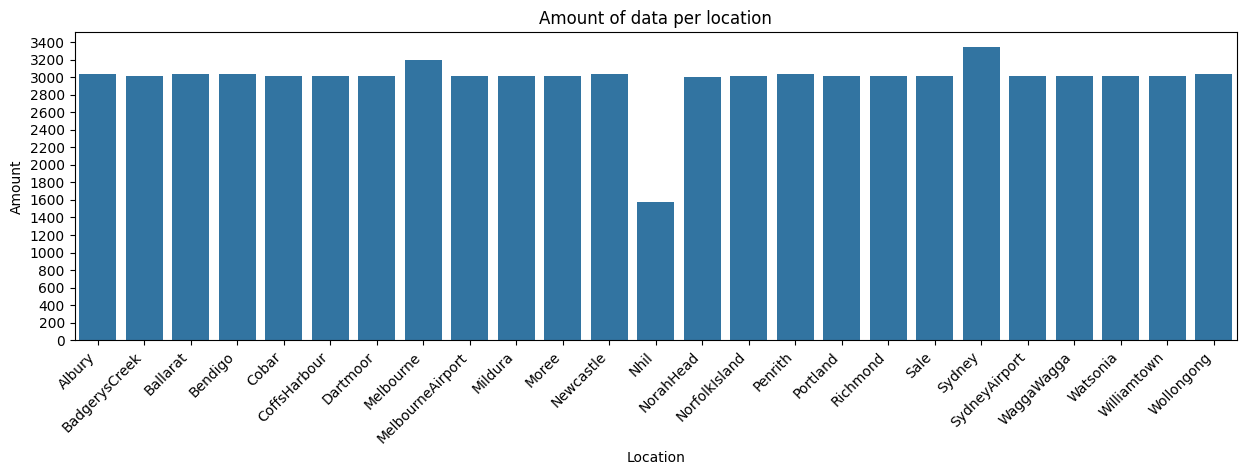

In [15]:
plt.figure(figsize=(15, 4))

sns.barplot(x=df_weather["Location"].value_counts().index, y=df_weather["Location"].value_counts().values)

plt.title("Amount of data per location")
plt.ylabel("Amount")
plt.xlabel("Location")

plt.yticks(range(0, 3401, 200))

plt.xticks(ha='right', rotation=45)

plt.show()

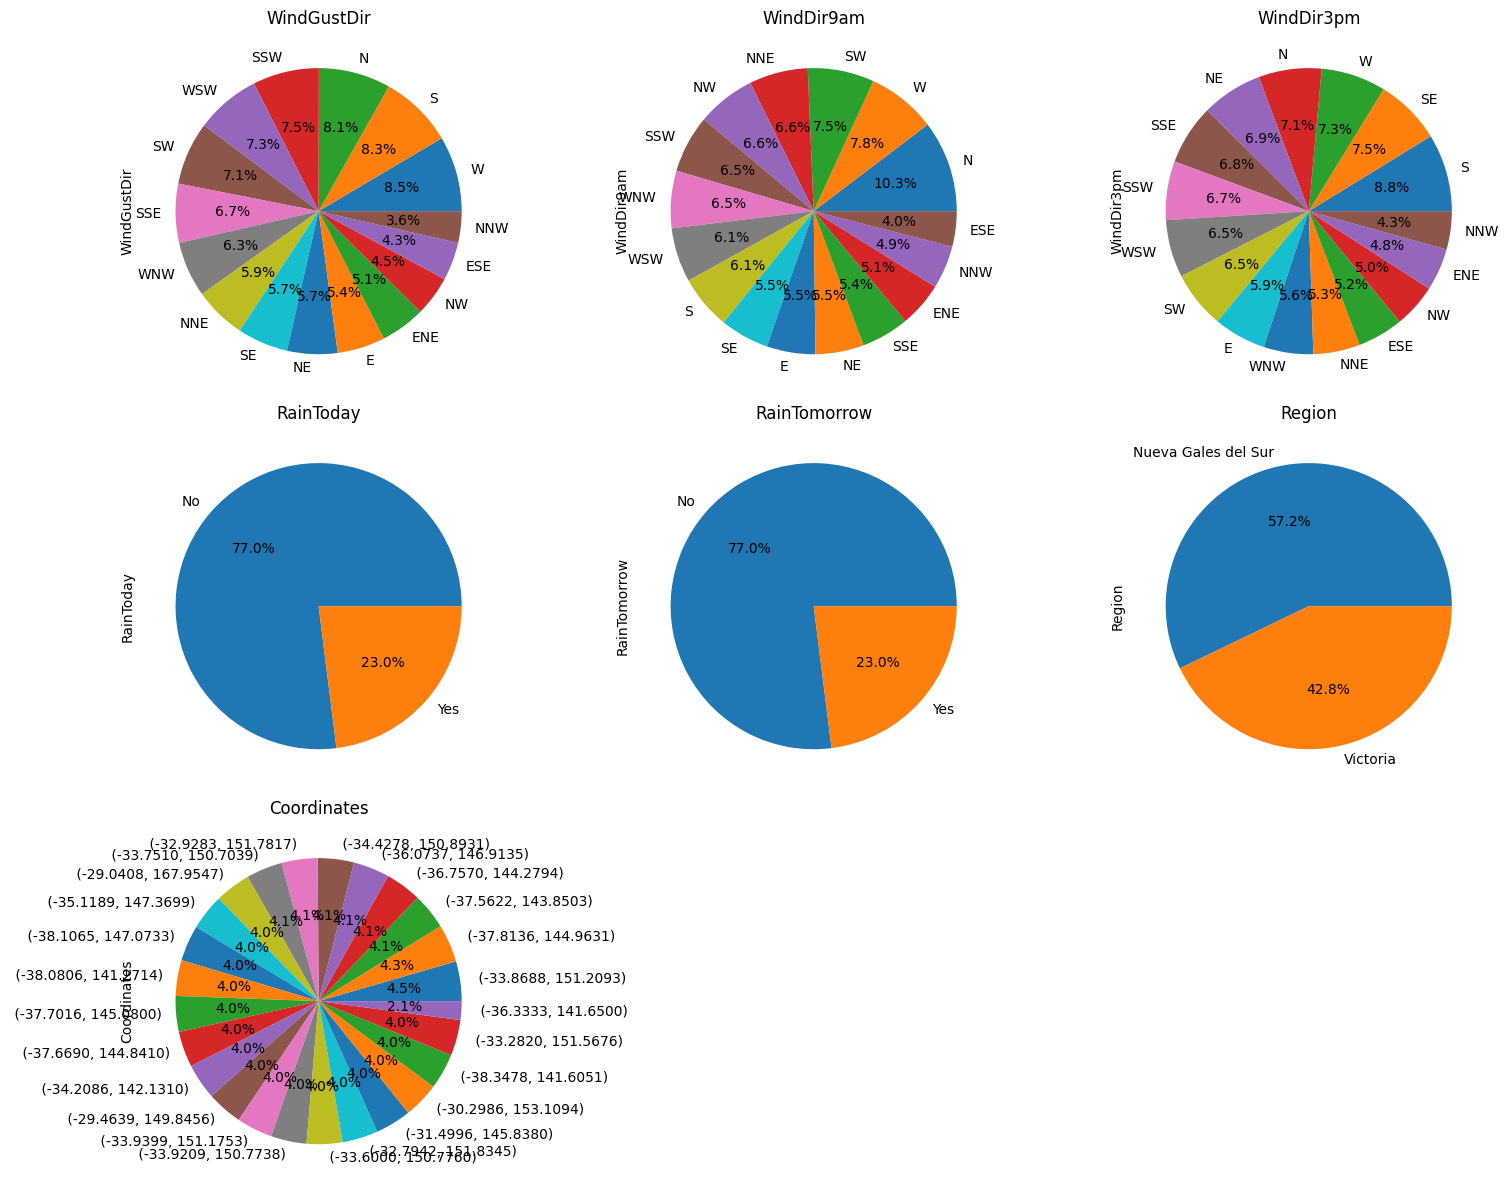

In [16]:
categorical_filtered = [col for col in categorical_features if col != 'Location']

plt.figure(figsize=(15, 12))

for i, col in enumerate(categorical_filtered, 1):
    plt.subplot(3, 3, i)
    df_weather[col].value_counts().plot.pie(autopct='%1.1f%%')
    plt.title(col)

plt.tight_layout()
plt.show()

### Variables Numéricas

In [17]:
numerical_features = df_weather.select_dtypes(include='number').columns
print(f'{numerical_features.values} \n\n Count: {len(numerical_features)}')

['MinTemp' 'MaxTemp' 'Rainfall' 'Evaporation' 'Sunshine' 'WindGustSpeed'
 'WindSpeed9am' 'WindSpeed3pm' 'Humidity9am' 'Humidity3pm' 'Pressure9am'
 'Pressure3pm' 'Cloud9am' 'Cloud3pm' 'Temp9am' 'Temp3pm'] 

 Count: 16


- Estadisticas

In [18]:
df_weather[numerical_features].describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,73401.000000,73551.000000,72369.000000,42528.000000,35954.000000,68951.000000,73517.000000,72893.000000,72949.000000,72355.000000,67118.000000,67163.000000,48166.000000,47334.000000,73390.000000,72781.000000
mean,11.757881,22.543714,2.335903,5.036990,7.146985,40.142870,14.059809,18.716214,71.795638,52.911423,1018.173842,1015.938791,4.710543,4.785271,16.127699,21.052599
std,5.746111,6.553097,8.127033,4.056227,3.879089,14.311925,9.352097,9.375796,17.877189,20.545659,7.162155,7.054910,2.888130,2.675554,5.661870,6.369763
min,-5.600000,4.600000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,3.000000,1.000000,980.500000,979.000000,0.000000,0.000000,-1.000000,1.700000
25%,7.500000,17.700000,0.000000,2.400000,4.100000,30.000000,7.000000,11.000000,60.000000,38.000000,1013.400000,1011.200000,1.000000,2.000000,11.900000,16.400000
50%,11.700000,21.900000,0.000000,4.000000,7.800000,39.000000,13.000000,19.000000,73.000000,53.000000,1018.300000,1016.100000,6.000000,6.000000,16.100000,20.400000
75%,16.200000,26.700000,0.800000,6.800000,10.300000,48.000000,19.000000,24.000000,86.000000,67.000000,1023.000000,1020.700000,7.000000,7.000000,20.400000,25.000000
max,31.900000,47.300000,371.000000,145.000000,14.500000,135.000000,130.000000,83.000000,100.000000,100.000000,1039.900000,1037.800000,9.000000,8.000000,37.700000,46.700000


- Del resumen estadístico se obtiene:

    **Valores Faltantes**

    - **Evaporation**, **Sunshine**, **Pressure9am**, **Pressure3pm**, **Cloud9am**, y **Cloud3pm** tienen un número significativo de valores faltantes, como se puede ver en el conteo (`count`) que es menor que el total de entradas (74492).

    **Outliers (Valores Atípicos)**

    - **Rainfall**: El valor máximo es 371, que es significativamente mayor que el tercer cuartil (0.8). Esto sugiere la presencia de outliers.
    - **Evaporation**: El valor máximo es 145, también mucho mayor que el tercer cuartil (6.8), indicando posibles outliers.
    - **WindGustSpeed**: El valor máximo es 135, que es bastante alto comparado con el tercer cuartil (48).
    - **WindSpeed9am** y **WindSpeed3pm**: Los valores máximos (130 y 83 respectivamente) son altos en comparación con sus respectivos tercer cuartiles (19 y 24).
    - **Temp9am** y **Temp3pm**: Los valores máximos (37.7 y 46.7) son altos, pero no tan extremos como en otras variables.

    **Distribución de Datos**

    - **MinTemp** y **MaxTemp**: La diferencia entre los valores mínimos y máximos sugiere una amplia variabilidad en las temperaturas.
    - **Humidity9am** y **Humidity3pm**: La humedad varía considerablemente, con valores que van desde 1 hasta 100.
    - **Pressure9am** y **Pressure3pm**: La presión también muestra variabilidad, aunque en un rango más estrecho.


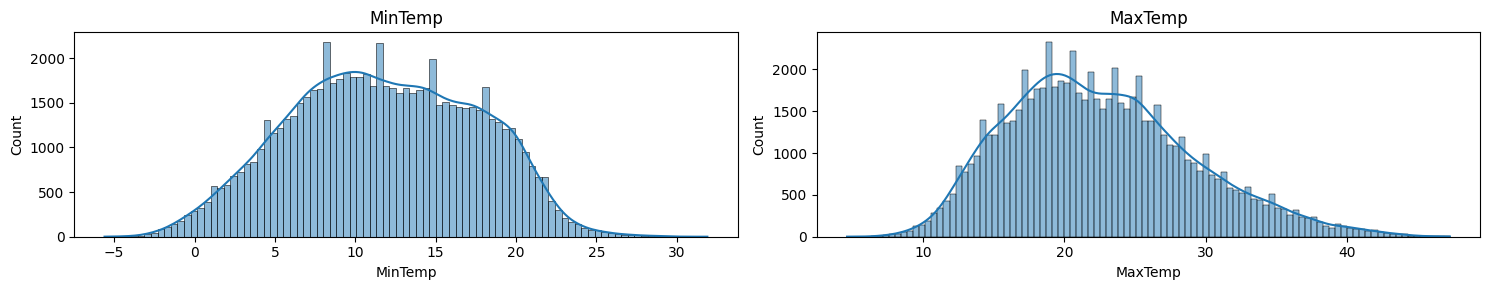

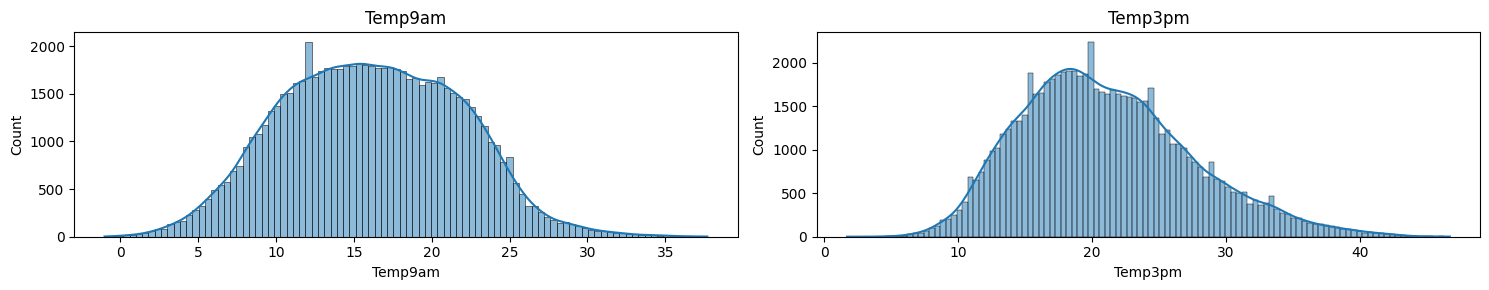

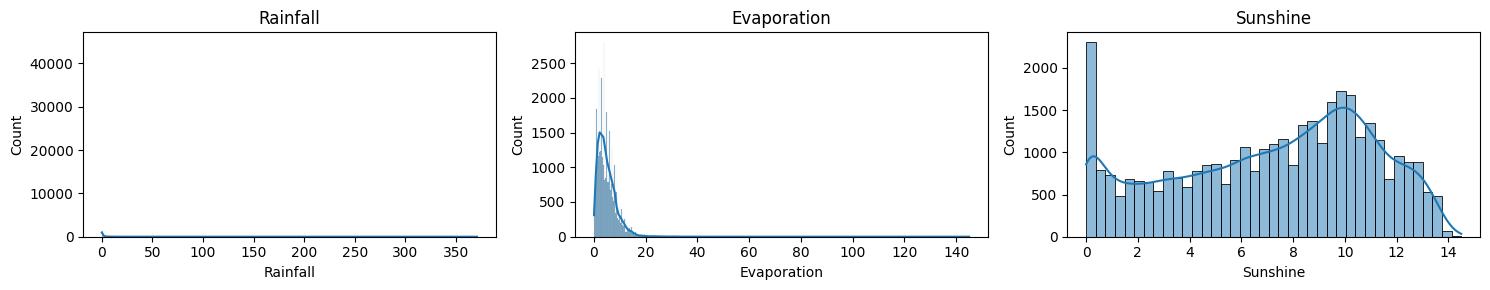

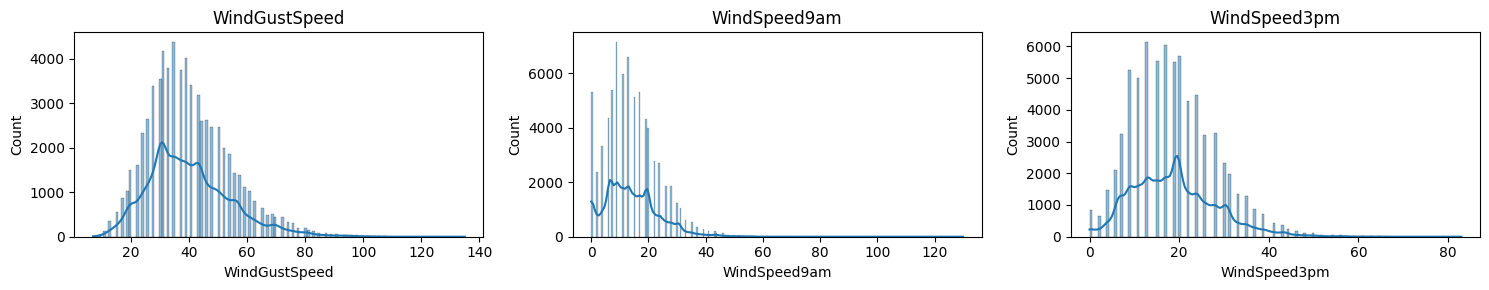

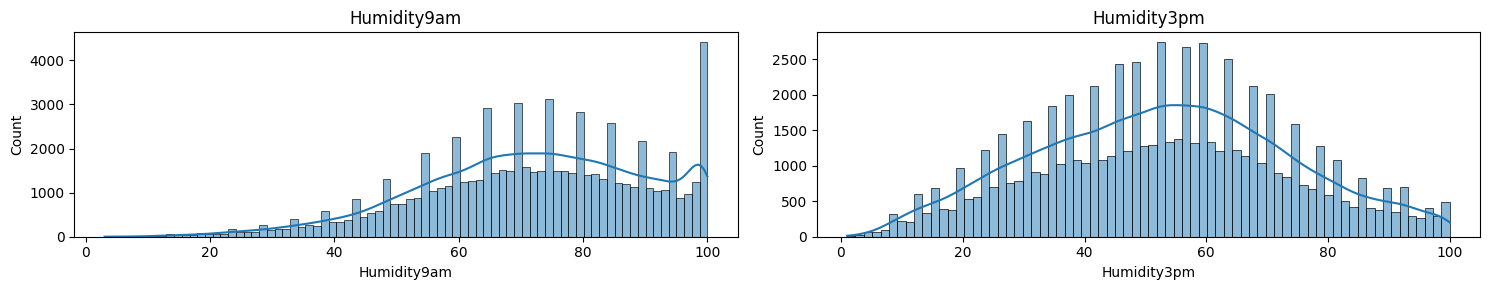

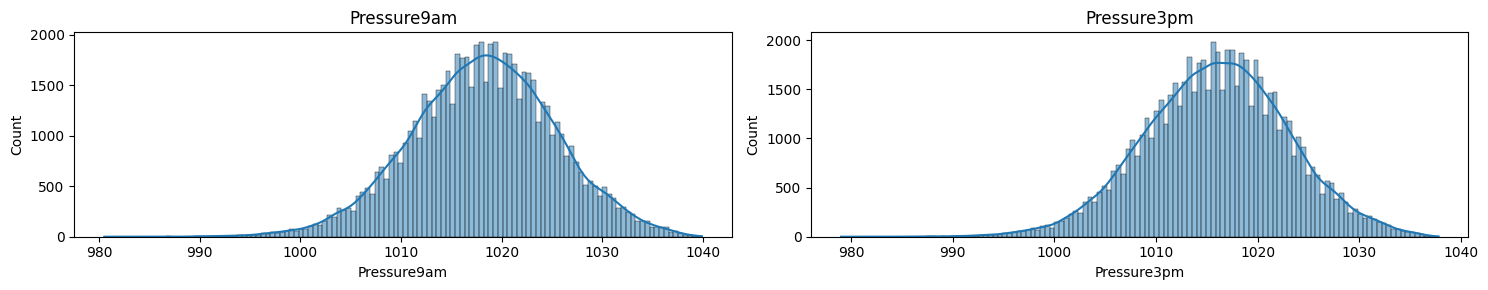

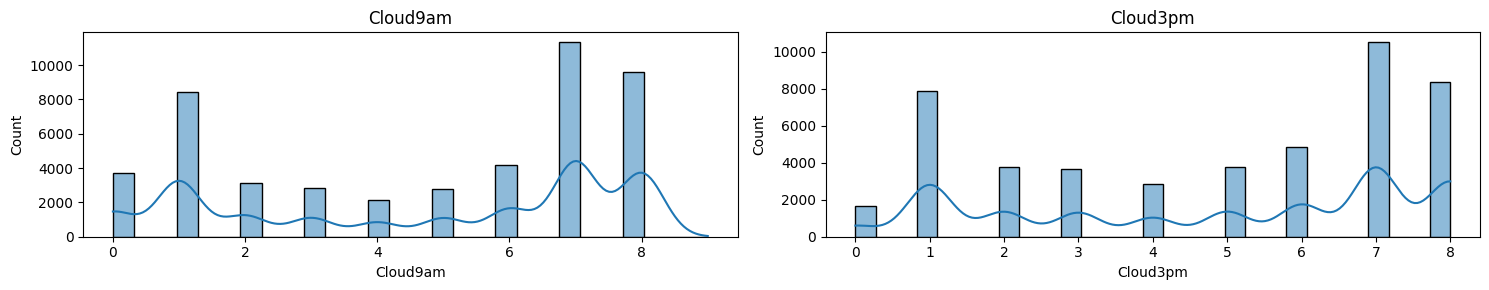

In [19]:
groups = [
    ['MinTemp', 'MaxTemp'],
    ['Temp9am', 'Temp3pm'],
    ['Rainfall', 'Evaporation', 'Sunshine'],
    ['WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm'],
    ['Humidity9am', 'Humidity3pm'],
    ['Pressure9am', 'Pressure3pm'],
    ['Cloud9am', 'Cloud3pm'],
]

# TODO: Cambiar el grafico a kdeplot, esto nos da una mejor idea de la distribucion de los datos y la relacioon conr el target. Si las curvas de densidad son diferentes entre las dos clases, puedes inferir que la variable numérica tiene una relación con el target.

for group in groups:
    plt.figure(figsize=(15, 3))
    for i, col in enumerate(group, 1):
        plt.subplot(1, len(group), i)
        sns.histplot(df_weather[col], kde=True)
        plt.title(col)
        #plt.yticks(range(0, 3401, 200)) # ajhustar or cada grafico
    plt.tight_layout()
    plt.show()

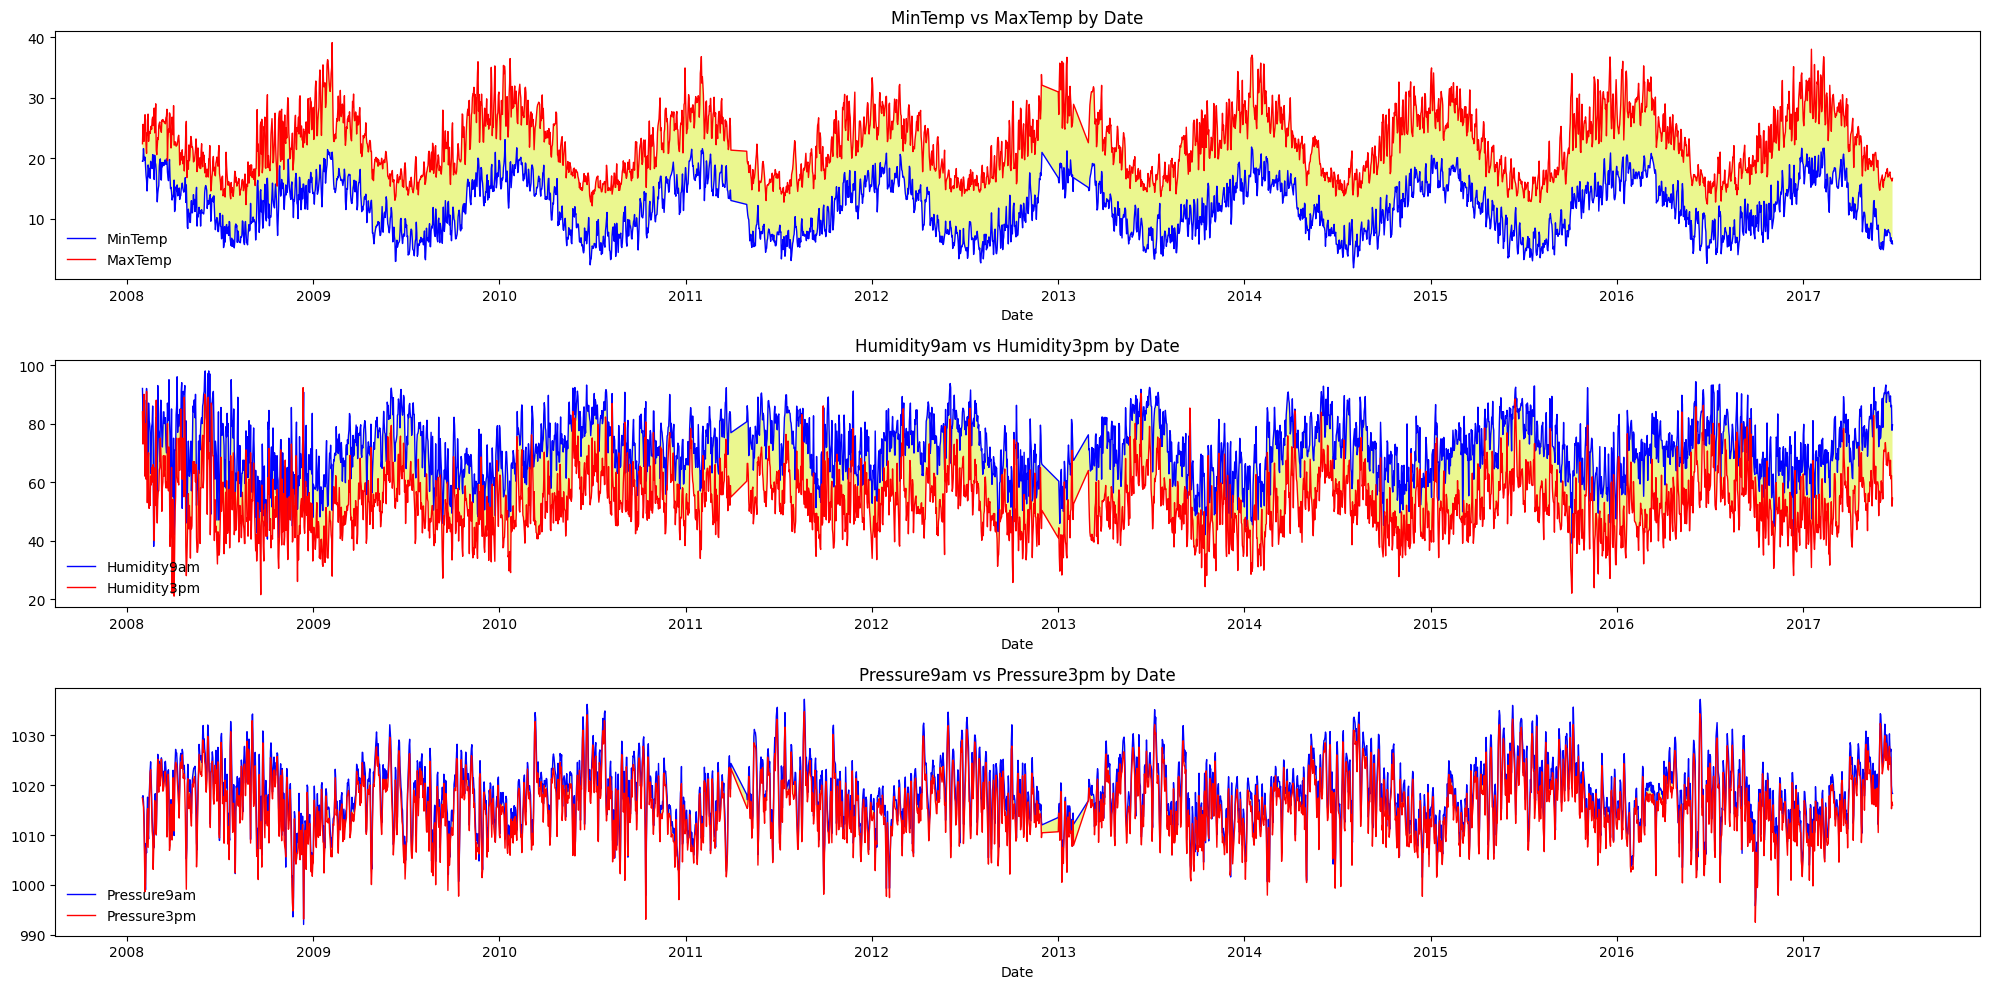

In [20]:
column_pairs = [['MinTemp', 'MaxTemp'], ['Humidity9am', 'Humidity3pm'], ['Pressure9am', 'Pressure3pm']]

fig, axs = plt.subplots(len(column_pairs), 1, figsize=(20, 10))

for i, pair in enumerate(column_pairs):
    df_dateplot = df_weather.groupby('Date')[pair].mean().reset_index()

    axs[i].plot(df_dateplot['Date'], df_dateplot[pair[0]], color='blue', linewidth=1, label=pair[0])
    axs[i].plot(df_dateplot['Date'], df_dateplot[pair[1]], color='red', linewidth=1, label=pair[1])
    axs[i].fill_between(df_dateplot['Date'], df_dateplot[pair[0]], df_dateplot[pair[1]], facecolor='#EBF78F')

    axs[i].set_title(f'{pair[0]} vs {pair[1]} by Date')
    axs[i].set_xlabel('Date')
    #axs[i].set_ylabel(pair[0])

    axs[i].legend(loc='lower left', frameon=False)

plt.tight_layout()
plt.show()

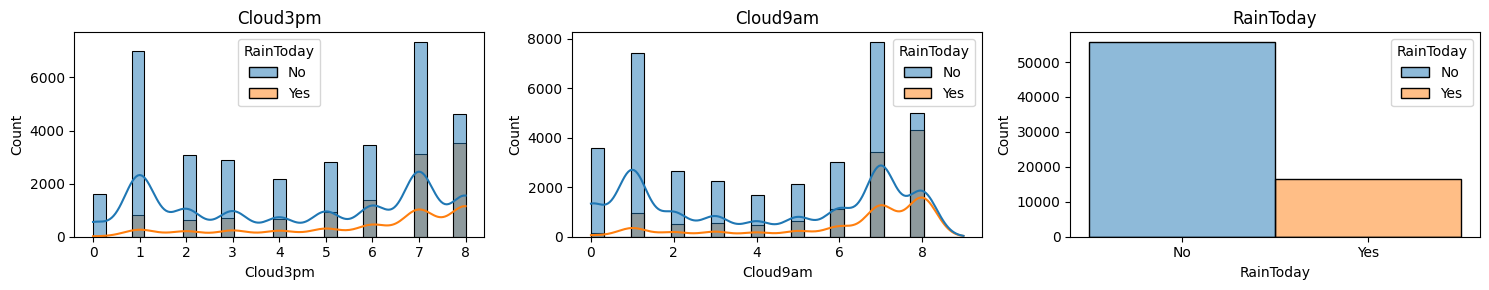

In [21]:
cloud_RainToday = df_weather[["Cloud3pm", "Cloud9am", "RainToday"]]

plt.figure(figsize=(15, 3))

for i, col in enumerate(cloud_RainToday.columns, 1):
    plt.subplot(1, len(cloud_RainToday.columns), i)
    sns.histplot(data=cloud_RainToday, x=col, hue="RainToday", kde=True)
    plt.title(col)
plt.tight_layout()

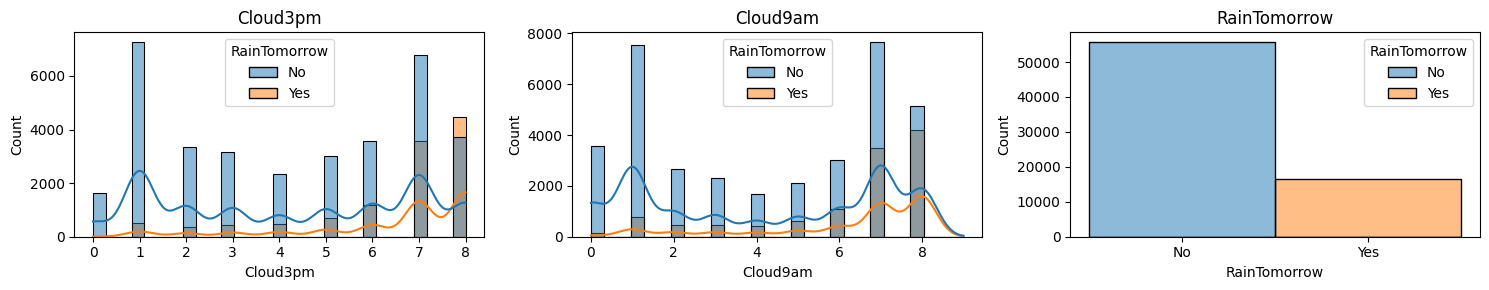

In [22]:
cloud_RainToday = df_weather[["Cloud3pm", "Cloud9am", "RainTomorrow"]]

plt.figure(figsize=(15, 3))

for i, col in enumerate(cloud_RainToday.columns, 1):
    plt.subplot(1, len(cloud_RainToday.columns), i)
    sns.histplot(data=cloud_RainToday, x=col, hue="RainTomorrow", kde=True)
    plt.title(col)
plt.tight_layout()

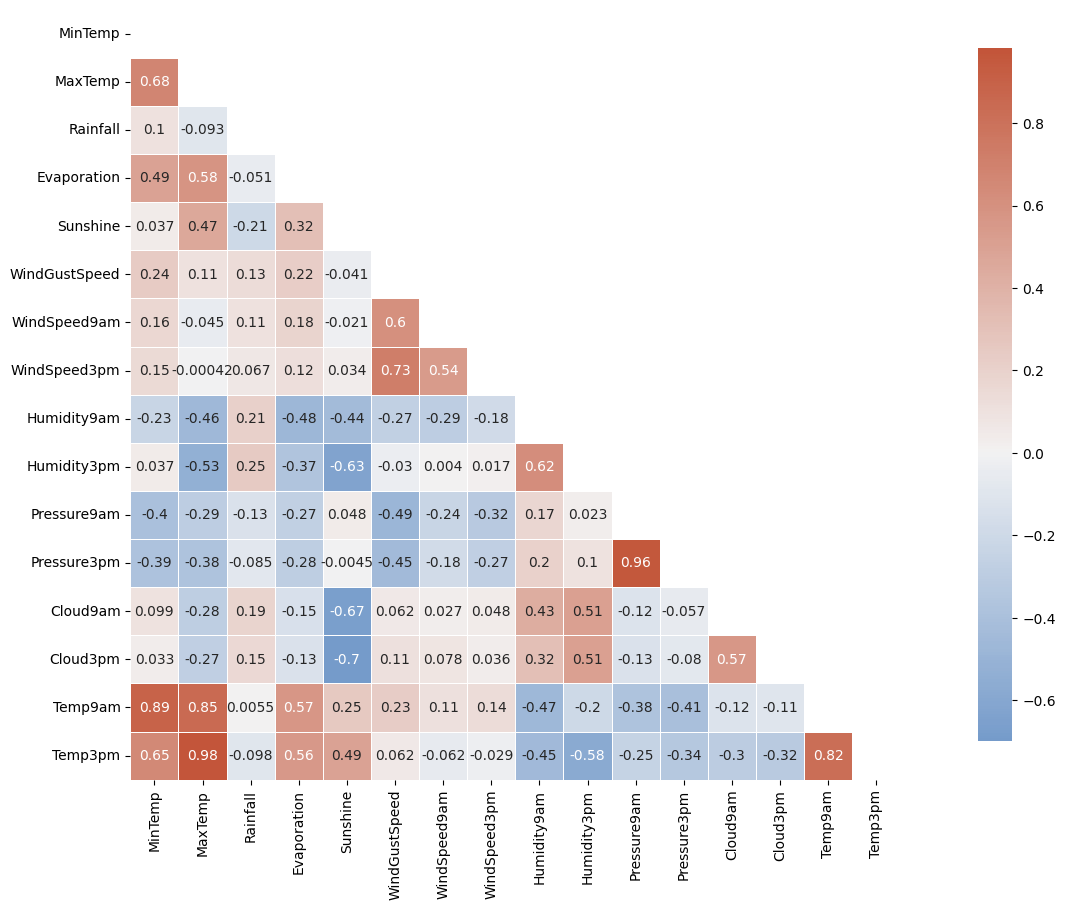

In [23]:
numerical_features = df_weather.select_dtypes(include='number').columns

corr = df_weather[numerical_features].corr(method='pearson', min_periods=1)
mask = np.triu(np.ones_like(corr, dtype=bool))

fig, ax = plt.subplots(figsize=(20, 10))
cmap = sns.diverging_palette(250, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=None, center=0,square=True, annot=True, linewidths=.5, cbar_kws={"shrink": .9})
plt.show()

In [24]:
# %%time
# sns.pairplot(df_weather)

In [25]:
# %%time
# sns.pairplot(df_weather, diag_kind='kde', kind='reg', hue="RainTomorrow")

## Datos Faltantes

In [26]:
def percent_missing(series):
    """
    Missing values percentage:
    """
    return series.isnull().mean() * 100

### Variables Categóricas

In [27]:
# categorical_features = df_weather.select_dtypes(include='object').columns
categorical_features

Index(['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday',
       'RainTomorrow', 'Region', 'Coordinates'],
      dtype='object')

In [28]:
df_weather[categorical_features].aggregate(['count', 'nunique', percent_missing]).transpose().nlargest(categorical_features.size, 'percent_missing')

,count,nunique,percent_missing
WindDir9am,68206.0,16.0,8.438490
WindGustDir,68945.0,16.0,7.446437
WindDir3pm,72062.0,16.0,3.262095
RainToday,72369.0,2.0,2.849970
RainTomorrow,72371.0,2.0,2.847286
Location,74492.0,25.0,0.000000
Region,74492.0,2.0,0.000000
Coordinates,74492.0,25.0,0.000000


### Variables Numéricas

In [29]:
numerical_features #= df_weather.select_dtypes(include='number').columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm'],
      dtype='object')

In [30]:
df_weather[numerical_features].aggregate(['count', 'nunique', percent_missing]).transpose().nlargest(numerical_features.size, 'percent_missing')

,count,nunique,percent_missing
Sunshine,35954.0,144.0,51.734414
Evaporation,42528.0,289.0,42.909306
Cloud3pm,47334.0,9.0,36.457606
Cloud9am,48166.0,10.0,35.340708
Pressure9am,67118.0,497.0,9.899050
Pressure3pm,67163.0,497.0,9.838640
WindGustSpeed,68951.0,64.0,7.438383
Humidity3pm,72355.0,100.0,2.868764
Rainfall,72369.0,535.0,2.849970
Temp3pm,72781.0,411.0,2.296891


- Datos faltantes de acuerdo a `RainTomorrow`: Se observa la misma proporción.

In [31]:
df_weather[numerical_features].groupby(df_weather['RainTomorrow']).apply(percent_missing)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
RainTomorrow,,,,,,,,,,,,,,,,
No,0.504298,0.296118,0.660433,42.850990,52.233449,6.724574,0.940399,1.807218,1.053463,1.911308,9.104287,9.039680,35.898494,37.511890,0.477378,1.345992
Yes,0.630631,0.180180,2.450450,42.714715,49.111111,7.537538,1.045045,1.891892,1.381381,2.078078,8.882883,8.852853,29.579580,29.171171,0.726727,1.471471


## Valores Atípicos

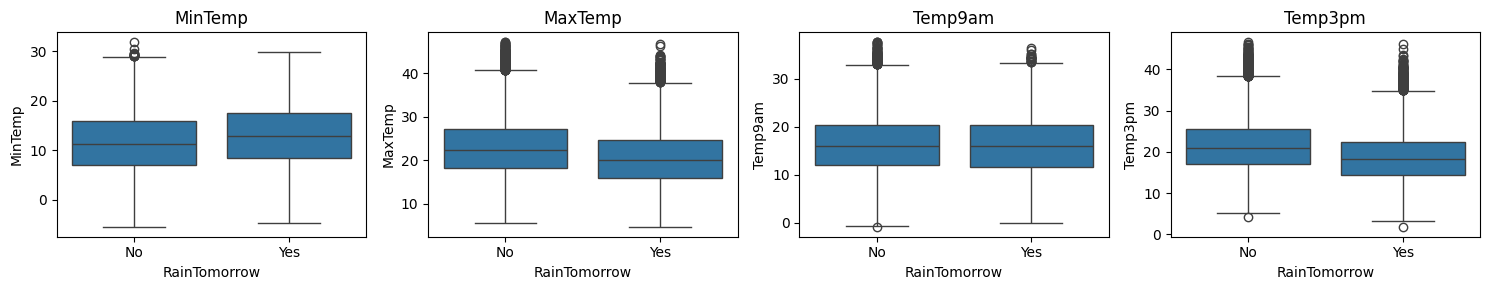

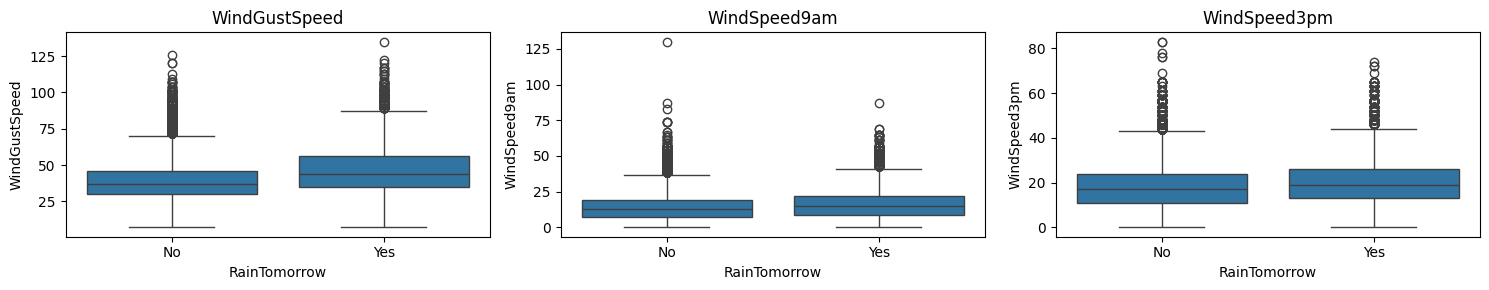

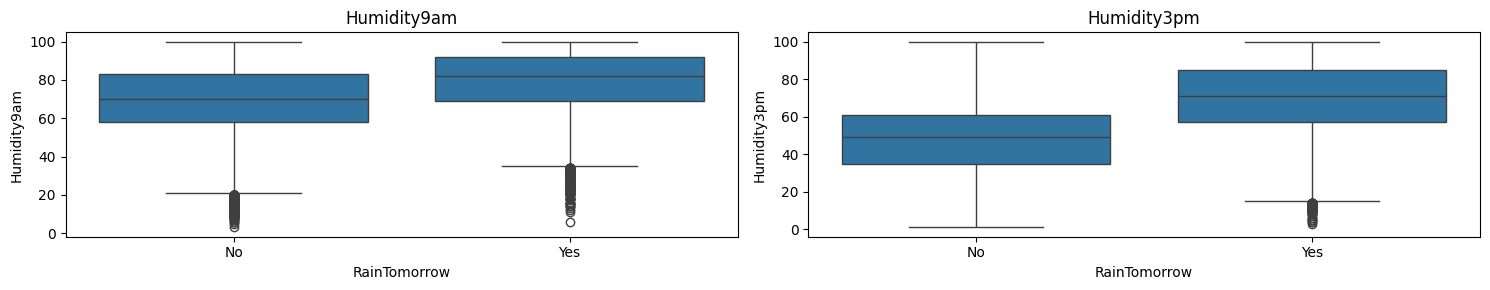

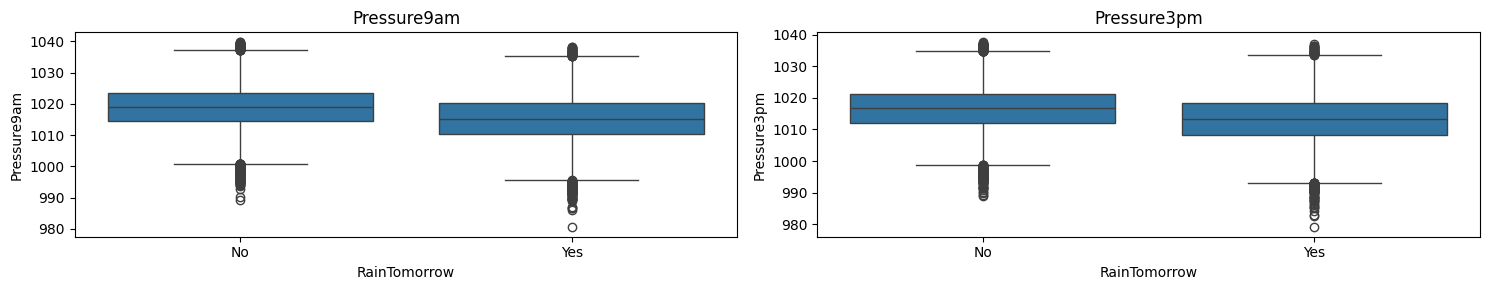

In [32]:
groups = [ 
    ['MinTemp', 'MaxTemp', 'Temp9am', 'Temp3pm'],
    #['Rainfall'],
    ['WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm'],
    ['Humidity9am', 'Humidity3pm'],
    ['Pressure9am', 'Pressure3pm'],
    #['Temp9am', 'Temp3pm']
]

for group in groups:
    plt.figure(figsize=(15, 3))
    for i, col in enumerate(group, 1):
        plt.subplot(1, len(group), i)
        sns.boxplot(x='RainTomorrow', y=col, data=df_weather, dodge=True)
        plt.title(col)
    plt.tight_layout()
    plt.show()

Para ``Rainfall``

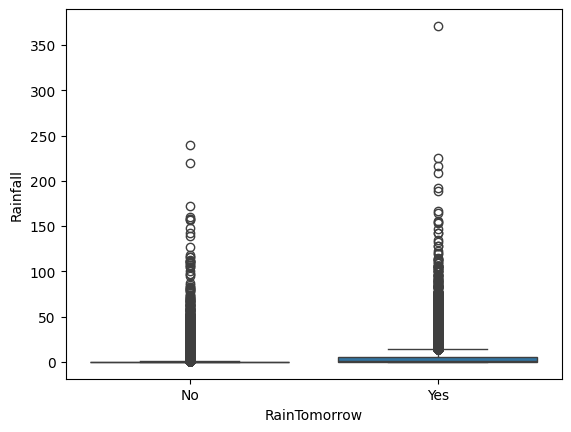

In [33]:
sns.boxplot(x='RainTomorrow', y='Rainfall', data=df_weather)
plt.show()

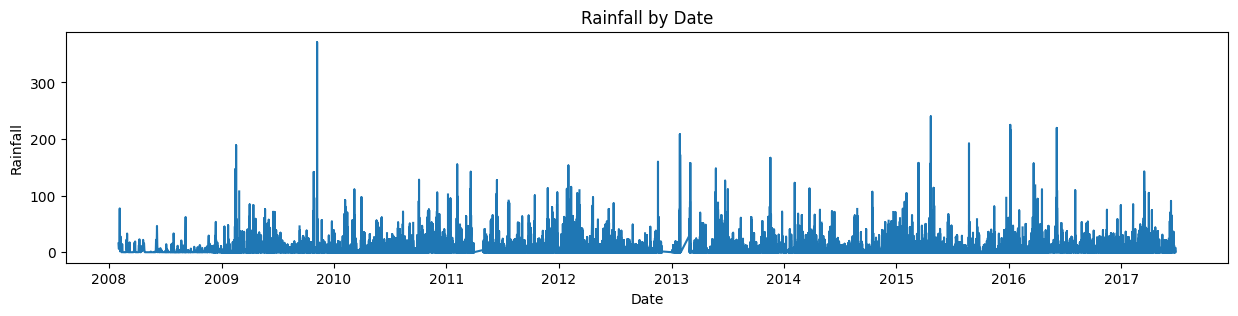

In [34]:
plt.figure(figsize=(15, 3))
plt.plot(df_weather['Date'], df_weather['Rainfall'])

plt.xlabel('Date')
plt.ylabel('Rainfall')
plt.title('Rainfall by Date')
plt.show()

In [35]:
def detect_outliers_iqr(data):
    """
    Detect outliers using the IQR method:
    """
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    return outliers.index, outliers

- Cantidad de valores atípicos en las variables numéricas.

In [36]:
outliers = pd.DataFrame(columns=['Column', 'Outliers', 'Percentage'])

for col in df_weather.select_dtypes(include='number').columns:
    outliers_idx = detect_outliers_iqr(df_weather[col])[0]
    if len(outliers_idx) > 0:
        outliers = pd.concat([outliers, pd.DataFrame({'Column': [col], 'Outliers': [len(outliers_idx)], 'Percentage': [len(outliers_idx) / df_weather.shape[0] * 100]})], ignore_index=True)

outliers.sort_values('Percentage', ascending=False)

,Column,Outliers,Percentage
2,Rainfall,13232,17.762981
4,WindGustSpeed,1505,2.020351
5,WindSpeed9am,1288,1.729045
3,Evaporation,1257,1.687430
6,WindSpeed3pm,929,1.247114
11,Temp3pm,787,1.056489
1,MaxTemp,641,0.860495
8,Pressure9am,507,0.680610
9,Pressure3pm,499,0.669871
7,Humidity9am,347,0.465822


In [37]:
# # Eliminar los outliers de la columna 'Rainfall'
# outliers_rainfall_idx = detect_outliers_iqr(df_weather['Rainfall'])[0]
# df_weather = df_weather.drop(index=outliers_rainfall_idx)

# # Verificar el resultado
# df_weather.shape

## Feature Engineering

- convertimos la columna `Date` a tipo `datetime`

In [38]:
df_weather["Year"] = df_weather["Date"].dt.year
df_weather["Month"] = df_weather["Date"].dt.month
df_weather["Day"] = df_weather["Date"].dt.day

df_weather.drop(columns=["Date"], inplace=True)

- Coordinates lo separamos en `Latitude` y `Longitude`

In [39]:
# Separate Coordinates into Latitude and Longitude
df_weather[['Latitude', 'Longitude']] = df_weather['Coordinates'].str.extract(r'\(([^,]+),\s*([^)]+)\)')
df_weather['Latitude'] = df_weather['Latitude'].astype(float)
df_weather['Longitude'] = df_weather['Longitude'].astype(float)

# Drop the original Coordinates column
df_weather.drop(columns=['Coordinates'], inplace=True)

- `Coordinates` se lo 

In [40]:
#df_weather.drop(columns=["Coordinates"], inplace=True)

Eliminar las filas donde ``RainTomorrow`` es nulo.

Problemas con la imputación de variables objetivo:
   - **Sesgo**: Imputar la variable objetivo puede introducir un sesgo en el modelo, ya que estaríamos "adivinando" los valores que queremos predecir.
   - **Fuga de datos**: Si usamos información de otras variables para imputar 'RainTomorrow', podríamos estar introduciendo información que el modelo no debería tener al hacer predicciones reales.
   - **Evaluación incorrecta**: Al evaluar el modelo, estaríamos midiendo su rendimiento en parte sobre datos imputados, lo que no reflejaría su verdadera capacidad predictiva.

In [41]:
df_weather = df_weather.dropna(subset=['RainTomorrow'])

In [42]:
df_weather[numerical_features] = df_weather[numerical_features].astype('float32')

# Modelos

In [43]:
from scripts.model_evaluation import plot_conf_matrix


from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

from category_encoders import BinaryEncoder

# Graficos
from sklearn import tree
import graphviz

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
# Pipeline para variables categóricas
from sklearn.impute import KNNImputer

from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import MinMaxScaler

from sklearn.experimental import enable_iterative_imputer  # Necesario para activar IterativeImputer
from sklearn.impute import IterativeImputer

# Definir las columnas por tipo
from statistics import LinearRegression
from sklearn.linear_model import LinearRegression

from sklearn.ensemble import RandomForestClassifier

from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import RobustScaler

from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import RandomizedSearchCV

from sklearn.model_selection import StratifiedKFold

from sklearn.tree import export_graphviz

In [44]:
X = df_weather.drop(columns='RainTomorrow')
y = df_weather['RainTomorrow']

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [46]:
y_train.replace({'No': 0, 'Yes': 1}, inplace=True)
y_test.replace({'No': 0, 'Yes': 1}, inplace=True)

- CATEGORICAL FEATURES

In [47]:
categorical_features = X_train.select_dtypes(include='category').columns
print(f'{categorical_features.values}\n')

['Location' 'WindGustDir' 'WindDir9am' 'WindDir3pm' 'RainToday' 'Region']



In [48]:
numeric_features = X_train.select_dtypes(include='number').columns
print(f'{numeric_features.values}\n')

['MinTemp' 'MaxTemp' 'Rainfall' 'Evaporation' 'Sunshine' 'WindGustSpeed'
 'WindSpeed9am' 'WindSpeed3pm' 'Humidity9am' 'Humidity3pm' 'Pressure9am'
 'Pressure3pm' 'Cloud9am' 'Cloud3pm' 'Temp9am' 'Temp3pm' 'Year' 'Month'
 'Day' 'Latitude' 'Longitude']



## Baseline: Decision Tree Classifier

En la [documentación Scikit-learn](https://scikit-learn.org/stable/modules/tree.html) se menciona que es capaz de manejar valores faltantes.

1. **Condiciones para el soporte de valores faltantes**:
   - **splitter='best'**: El soporte para valores faltantes solo está disponible cuando el parámetro `splitter` se establece en `'best'`.
   - **criterios específicos**: Para clasificación, los criterios pueden ser `'gini'`, `'entropy'` o `'log_loss'`. Para regresión, los criterios pueden ser `'squared_error'`, `'friedman_mse'` o `'poisson'`.

   Si no se usa `splitter='best'`, el modelo no manejará los valores faltantes de la manera descrita.

2. **Manejo de datos faltantes**:
   - Para cada umbral potencial en los datos no faltantes, el divisor evaluará la división considerando que todos los valores faltantes vayan al nodo izquierdo o al nodo derecho.
   - Esto significa que el modelo toma decisiones sobre cómo manejar los valores faltantes durante el proceso de división, evaluando ambas posibilidades (todos a la izquierda o todos a la derecha) y eligiendo la mejor opción según el criterio especificado.

Se construye el modelo más simple posible de Decision Tree Classifier (baseline), esto nos permitirá tener una referencia para comparar con modelos más complejos.

Preprocesamiento:
- Todas las variables categóricas imputan com la moda ``SimpleImputer`` y se codifican con `BinaryEncoder`.
- Todas variables numéricas se imputan con la media ``SimpleImputer`` y se escalan con `MinMaxScaler`.

Los únicos hiperparámetros que se ajustan son `max_depth=9` y `class_weight='balanced'`. El primero se ajusta para evitar el sobreajuste y el segundo para compensar el desbalanceo de clase minoritaria.

### Pipeline

In [49]:
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('binary', BinaryEncoder())
])

In [50]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', MinMaxScaler())
])

In [51]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ],
    #remainder='passthrough',
    #force_int_remainder_cols=False,
)

In [52]:
pipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(sampling_strategy=1, random_state=42)),
    ('classifier', DecisionTreeClassifier(max_depth=9, class_weight='balanced', random_state=42))
])

In [53]:
# Obtener los hiperparámetros del clasificador
hyperparams = pipeline.named_steps['classifier'].get_params()
hyperparams

{'ccp_alpha': 0.0,
 'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': 9,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': 42,
 'splitter': 'best'}

### Fit

In [54]:
%%time
pipeline.fit(X_train, y_train)

CPU times: total: 2.48 s
Wall time: 1.67 s


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm',...
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('binary',
                                                                   BinaryEncoder())]),
                                                  Index(['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday',
       'Region'],
      dtype='object'))])),
                ('smote', SMOTE(random_state=42, sampling_strategy=1)),
                ('classifier',
                 DecisionTreeClassifier(class_weight='balanced', max_depth=9,
                                        random_state=42))])

              precision    recall  f1-score   support

           0       0.90      0.83      0.86     11211
           1       0.53      0.67      0.59      3264

    accuracy                           0.79     14475
   macro avg       0.71      0.75      0.73     14475
weighted avg       0.81      0.79      0.80     14475



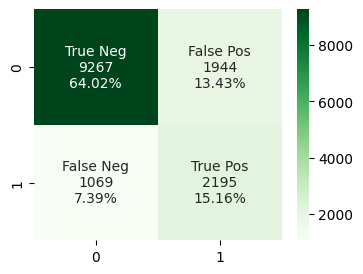

In [55]:
y_test_pred = pipeline.predict(X_test)

print(classification_report(y_test, y_test_pred))

conf_matrix = plot_conf_matrix(y_test, y_test_pred)

              precision    recall  f1-score   support

           0       0.91      0.84      0.87     44510
           1       0.58      0.71      0.64     13386

    accuracy                           0.81     57896
   macro avg       0.74      0.78      0.76     57896
weighted avg       0.83      0.81      0.82     57896



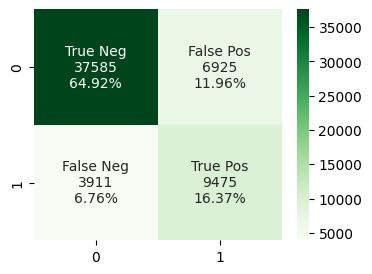

In [56]:
y_train_pred = pipeline.predict(X_train)

print(classification_report(y_train, y_train_pred))

conf_matrix = plot_conf_matrix(y_train, y_train_pred)

Interpretación:
- Caso 1: hiperparámetros por defecto ``DecisionTreeClassifier(random_state=42)``
    - El modelo tiene un buen desempeño en el conjunto de entrenamiento, con alta precisión y recall para la clase 0, muestra un comportamiento similar con la clase 1 que en el conjunto de evaluación.
    - El hecho de que la precisión y el recall para la clase 1 sean mucho mejores en el conjunto de entrenamiento sugiere que el modelo esta sobreajustado.
    - Overfitting: La diferencia significativa en la precisión y recall entre los conjuntos de entrenamiento y evaluación para la clase 1 indica que el modelo está sobreajustado.
    - Desbalance de Clases: Podría ser necesario aplicar técnicas para manejar el desbalance de clases, como submuestreo de la clase mayoritaria, sobre muestreo de la clase minoritaria o usar técnicas de penalización en el modelo

- Caso 2: hiperparámetros por defecto ``DecisionTreeClassifier(max_depth=9, class_weight='balanced', random_state=42)``
    - Se ajustan son `max_depth=9` y `class_weight='balanced'`. El primero se ajusta para evitar el sobreajuste y el segundo para compensar el desbalanceo de clase minoritaria.

In [57]:
from sklearn.metrics import classification_report

# Obtener el reporte de clasificación como diccionario
report_train = classification_report(y_train, y_train_pred, output_dict=True)
report_test = classification_report(y_test, y_test_pred, output_dict=True)

# Extraer métricas
metrics = ['precision', 'recall', 'f1-score']
train_scores = [report_train['0'][metric] for metric in metrics] + [report_train['1'][metric] for metric in metrics]
test_scores = [report_test['0'][metric] for metric in metrics] + [report_test['1'][metric] for metric in metrics]

# Soporte
support_train = [report_train['0']['support'], report_train['1']['support']]
support_test = [report_test['0']['support'], report_test['1']['support']]


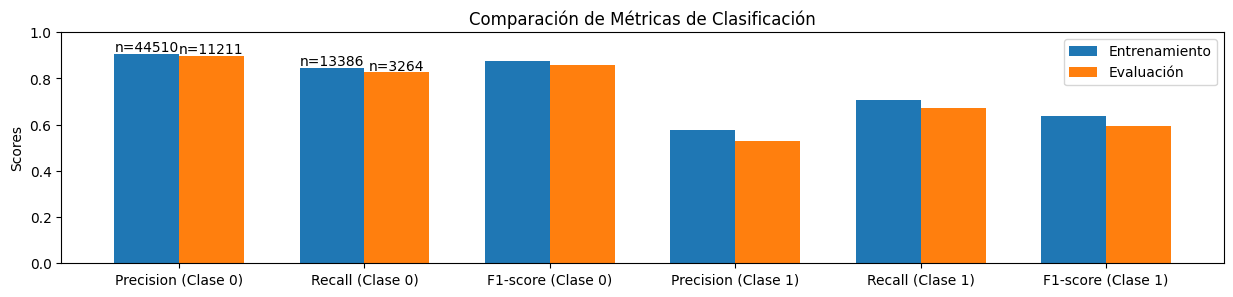

In [58]:
import matplotlib.pyplot as plt

# Crear etiquetas para el gráfico
labels = ['Precision (Clase 0)', 'Recall (Clase 0)', 'F1-score (Clase 0)', 'Precision (Clase 1)', 'Recall (Clase 1)', 'F1-score (Clase 1)']
x = np.arange(len(labels))  # la ubicación de las etiquetas
width = 0.35  # el ancho de las barras

fig, ax = plt.subplots(figsize=(15, 3))

# Barras para el conjunto de entrenamiento
rects1 = ax.bar(x - width/2, train_scores, width, label='Entrenamiento')

# Barras para el conjunto de evaluación
rects2 = ax.bar(x + width/2, test_scores, width, label='Evaluación')

# Añadir soporte como texto en el gráfico
for i in range(len(support_train)):
    ax.text(i - width/2, train_scores[i] + 0.01, f'n={int(support_train[i])}', ha='center')
    ax.text(i + width/2, test_scores[i] + 0.01, f'n={int(support_test[i])}', ha='center')

# Añadir algunas etiquetas y título
ax.set_ylabel('Scores')
ax.set_title('Comparación de Métricas de Clasificación')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.ylim(0, 1)  # Ajustar el límite del eje Y para que se vea mejor
plt.show()


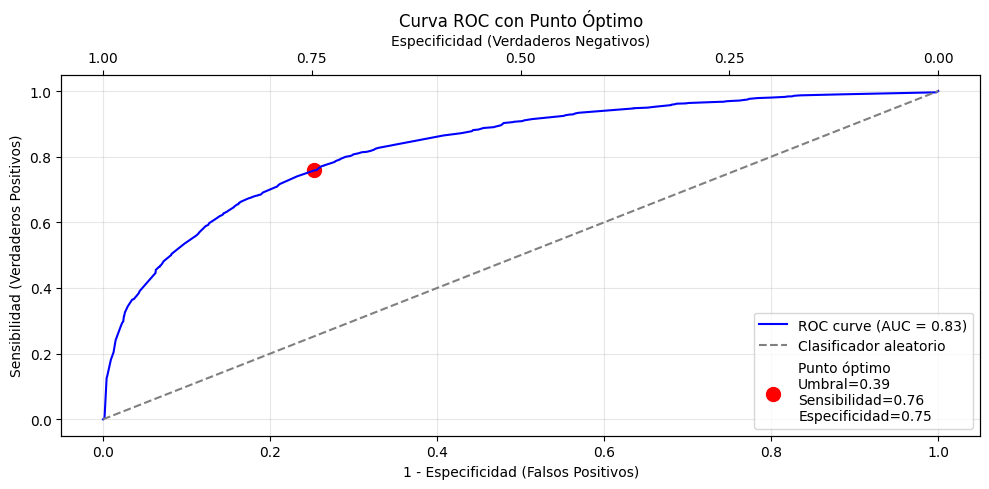

In [59]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Obtener las probabilidades de predicción para la clase positiva (1)
y_scores = pipeline.predict_proba(X_test)[:, 1]  # Probabilidades para la clase 1, con [:, 0] serían las de la clase 0

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# Calcular el AUC
roc_auc = auc(fpr, tpr)

# Encontrar el punto óptimo (donde sensibilidad y especificidad son más cercanas)
specificity = 1 - fpr
optimal_idx = np.argmin(np.abs(tpr - specificity))
optimal_threshold = thresholds[optimal_idx]

# Crear figura y eje principal para la curva ROC
fig, ax1 = plt.subplots(figsize=(10, 5))

# Graficar la curva ROC
ax1.plot(fpr, tpr, color='b', label=f'ROC curve (AUC = {roc_auc:.2f})')
ax1.set_xlabel('1 - Especificidad (Falsos Positivos)')
ax1.set_ylabel('Sensibilidad (Verdaderos Positivos)')
ax1.set_title('Curva ROC con Punto Óptimo')

# Agregar la línea diagonal
ax1.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Clasificador aleatorio')

# Marcar el punto óptimo
ax1.scatter(fpr[optimal_idx], tpr[optimal_idx], color='red', s=100, 
           label=f'Punto óptimo\nUmbral={optimal_threshold:.2f}\nSensibilidad={tpr[optimal_idx]:.2f}\nEspecificidad={specificity[optimal_idx]:.2f}')

# Crear un segundo eje X para la Especificidad
ax2 = ax1.twiny()
ax2.set_xlim(ax1.get_xlim())
ax2.set_xlabel('Especificidad (Verdaderos Negativos)')

# Ajustar las marcas del eje para mejor visualización
n_ticks = 5
tick_locations = np.linspace(0, 1, n_ticks)
ax2.set_xticks(tick_locations)
ax2.set_xticklabels([f'{(1-x):.2f}' for x in tick_locations])

# Agregar cuadrícula
ax1.grid(True, alpha=0.3)

# Mostrar leyenda
ax1.legend(loc='lower right')

plt.tight_layout()
plt.show()

- Al modificar el umbral de decisión, se puede ajustar el trade-off entre precisión y recall, lo que puede ser útil dependiendo de la aplicación.

              precision    recall  f1-score   support

           0       0.90      0.82      0.86     11211
           1       0.52      0.68      0.59      3264

    accuracy                           0.79     14475
   macro avg       0.71      0.75      0.72     14475
weighted avg       0.81      0.79      0.80     14475



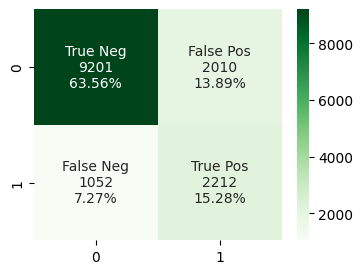

In [60]:
#  df thresholds  fpr, tpr, thresholds
# roc_values = pd.DataFrame({'fpr': fpr, 'tpr': tpr, 'thresholds': thresholds})

threshold = 0.44
y_test_pred_11_recall = y_scores = pipeline.predict_proba(X_test)
y_test_pred_11_recall = (y_test_pred_11_recall[:, 1] >= threshold).astype(int)

print(classification_report(y_test, y_test_pred_11_recall))

plot_conf_matrix(y_test, y_test_pred_11_recall)

- Learning Curve (Curva de Aprendizaje)

In [61]:
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt


In [62]:
# Define el rango de tamaños del conjunto de entrenamiento
train_sizes, train_scores, test_scores = learning_curve(
    pipeline, X_train, y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=5, scoring='accuracy', n_jobs=-1
)

# Calcular la media y la desviación estándar de los puntajes
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)


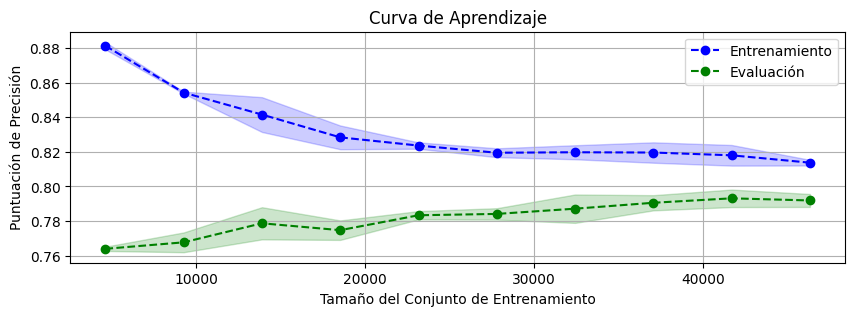

In [63]:
plt.figure(figsize=(10, 3))
plt.plot(train_sizes, train_scores_mean, label='Entrenamiento', color='blue', linestyle='--', marker='o')
plt.plot(train_sizes, test_scores_mean, label='Evaluación', color='green', linestyle='--', marker='o')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, color='blue', alpha=0.2)
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, color='green', alpha=0.2)

plt.title('Curva de Aprendizaje')
plt.xlabel('Tamaño del Conjunto de Entrenamiento')
plt.ylabel('Puntuación de Precisión')
plt.legend(loc='best')

#plt.ylim(0, 1.0)

plt.grid()
plt.show()


Interpretación de la Curva de Aprendizaje
- Curvas Estables: Si ambas curvas (entrenamiento y evaluación) son altas y se acercan, tu modelo está bien ajustado y se beneficia de más datos.
- Curva de Entrenamiento Alta y Evaluación Baja: Indica sobreajuste. El modelo funciona bien en el entrenamiento pero no en datos no vistos.
- Curva de Entrenamiento y Evaluación Bajas: Sugiere subajuste. El modelo no captura bien la relación entre las características y la variable objetivo.

In [64]:
# Obtener el modelo final (DecisionTreeClassifier) después del pipeline
model = pipeline.named_steps['classifier']

# Obtener las importancias de las características
importances = model.feature_importances_


In [65]:
# Obtener los nombres de las características transformadas
encoded_columns = pipeline.named_steps['preprocessor'].get_feature_names_out()

# Mostrar las importancias con sus correspondientes nombres de columnas
import pandas as pd

feature_importances = pd.DataFrame({'feature': encoded_columns, 'importance': importances})
feature_importances = feature_importances.sort_values(by='importance', ascending=True)


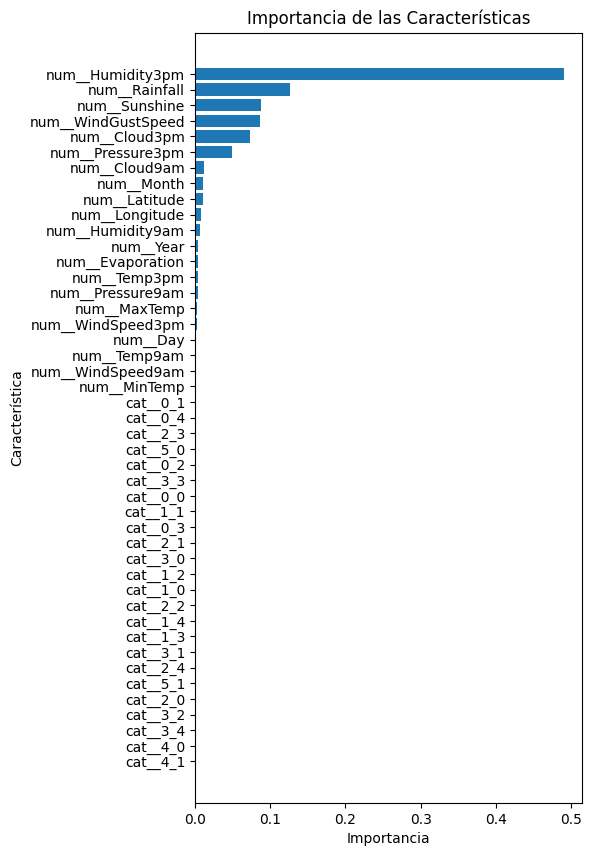

In [66]:
fig, ax = plt.subplots(figsize=(5, 10))

# Graficar las importancias
ax.barh(feature_importances['feature'], feature_importances['importance'])
ax.set_xlabel('Importancia')
ax.set_ylabel('Característica')
ax.set_title('Importancia de las Características')
plt.show()


In [67]:
# graficamos el arbol de decision
# plt.figure(figsize=(20, 5))
# tree.plot_tree(model, filled=True, feature_names=encoded_columns, max_depth=2)
# plt.show()


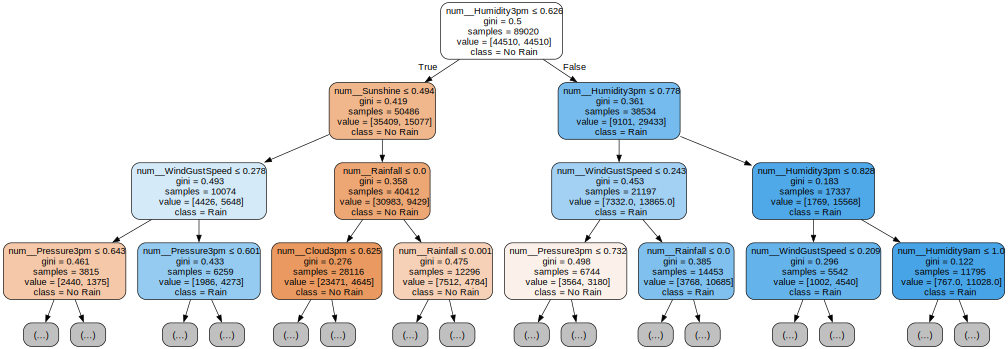

In [68]:
dot_data = tree.export_graphviz(pipeline.named_steps['classifier'], out_file=None,
                                feature_names=encoded_columns,
                                class_names=['No Rain', 'Rain'],
                                filled=True, rounded=True,
                                special_characters=True,
                                max_depth= 3)

# Añadir el atributo de tamaño al string DOT
dot_data = 'digraph Tree {\nsize="14,10";\n' + dot_data.split('digraph Tree {', 1)[1]

graph = graphviz.Source(dot_data)
graph




# Funciones para graficar

In [69]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report 

def plot_classification_metrics(y_train, y_pred_train, y_test, y_pred_test, title='Comparación de Métricas de Clasificación'):
    """
    Función para visualizar y mostrar el reporte de clasificación para las clases 0 y 1.
    
    Parameters:
    - y_train: array-like, etiquetas reales del conjunto de entrenamiento.
    - y_pred_train: array-like, predicciones del conjunto de entrenamiento.
    - y_test: array-like, etiquetas reales del conjunto de prueba.
    - y_pred_test: array-like, predicciones del conjunto de prueba.
    - title: str, título para el gráfico.
    """
    # Obtener el reporte de clasificación como diccionario
    report_train = classification_report(y_train, y_pred_train, output_dict=True)
    report_test = classification_report(y_test, y_pred_test, output_dict=True)
    
    # Mostrar el reporte de clasificación en consola
    # print("Reporte de Clasificación - Entrenamiento")
    # print(classification_report(y_train, y_pred_train))
    
    # print("\nReporte de Clasificación - Prueba")
    # print(classification_report(y_test, y_pred_test))
    
    # Extraer métricas de precisión, recall y F1-score
    metrics = ['precision', 'recall', 'f1-score']
    train_scores = [report_train['0'][metric] for metric in metrics] + [report_train['1'][metric] for metric in metrics]
    test_scores = [report_test['0'][metric] for metric in metrics] + [report_test['1'][metric] for metric in metrics]

    # Crear etiquetas para el gráfico
    labels = [
        'Precisión (Clase 0)', 'Recall (Clase 0)', 'F1-score (Clase 0)', 
        'Precisión (Clase 1)', 'Recall (Clase 1)', 'F1-score (Clase 1)'
    ]
    x = np.arange(len(labels))  # la ubicación de las etiquetas
    width = 0.35  # el ancho de las barras

    fig, ax = plt.subplots(figsize=(15, 5))

    # Barras para el conjunto de entrenamiento
    rects1 = ax.bar(x - width/2, train_scores, width, label='Entrenamiento')

    # Barras para el conjunto de evaluación
    rects2 = ax.bar(x + width/2, test_scores, width, label='Evaluación')

    # Añadir valores numéricos en las barras
    for i, rect in enumerate(rects1):
        ax.text(
            rect.get_x() + rect.get_width() / 2, rect.get_height(), 
            f'{train_scores[i]:.2f}', ha='center', va='bottom'
        )

    for i, rect in enumerate(rects2):
        ax.text(
            rect.get_x() + rect.get_width() / 2, rect.get_height(), 
            f'{test_scores[i]:.2f}', ha='center', va='bottom'
        )

    # Añadir etiquetas y título
    ax.set_ylabel('Scores')
    ax.set_title(title)
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()

    # Ajustar el límite del eje Y para que se vea mejor
    plt.ylim(0, 1)
    plt.tight_layout()
    plt.show()

In [92]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

def plot_roc_curve(model, X_test, y_test, title='Curva ROC con Punto Óptimo'):
    """
    Función para graficar la curva ROC y encontrar el punto óptimo.

    Parameters:
    - model: el modelo entrenado.
    - X_test: conjunto de características de prueba.
    - y_test: etiquetas reales del conjunto de prueba.
    - title: título del gráfico.
    """
    # Obtener las probabilidades de predicción para la clase positiva (1)
    y_scores = model.predict_proba(X_test)[:, 1]  # Probabilidades para la clase 1

    # Calcular la curva ROC
    fpr, tpr, thresholds = roc_curve(y_test, y_scores)

    # Calcular el AUC
    roc_auc = auc(fpr, tpr)

    # Encontrar el punto óptimo (donde sensibilidad y especificidad son más cercanas)
    specificity = 1 - fpr
    optimal_idx = np.argmin(np.abs(tpr - specificity))
    optimal_threshold = thresholds[optimal_idx]

    # Crear figura y eje principal para la curva ROC
    fig, ax1 = plt.subplots(figsize=(10, 5))

    # Graficar la curva ROC
    ax1.plot(fpr, tpr, color='b', label=f'ROC curve (AUC = {roc_auc:.2f})')
    ax1.set_xlabel('1 - Especificidad (Falsos Positivos)')
    ax1.set_ylabel('Sensibilidad (Verdaderos Positivos)')
    ax1.set_title(title)

    # Agregar la línea diagonal
    ax1.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Clasificador aleatorio')

    # Marcar el punto óptimo
    ax1.scatter(fpr[optimal_idx], tpr[optimal_idx], color='red', s=100, 
               label=f'Punto óptimo\nUmbral={optimal_threshold:.2f}\nSensibilidad={tpr[optimal_idx]:.2f}\nEspecificidad={specificity[optimal_idx]:.2f}')

    # Crear un segundo eje X para la Especificidad
    ax2 = ax1.twiny()
    ax2.set_xlim(ax1.get_xlim())
    ax2.set_xlabel('Especificidad (Verdaderos Negativos)')

    # Ajustar las marcas del eje para mejor visualización
    n_ticks = 5
    tick_locations = np.linspace(0, 1, n_ticks)
    ax2.set_xticks(tick_locations)
    ax2.set_xticklabels([f'{(1-x):.2f}' for x in tick_locations])

    # Agregar cuadrícula
    ax1.grid(True, alpha=0.3)

    # Mostrar leyenda
    ax1.legend(loc='lower right')

    plt.tight_layout()
    plt.show()

# Preprocesamiento

In [70]:
import warnings
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils.validation import check_is_fitted

class GroupedImputer(BaseEstimator, TransformerMixin):
    """
    Imputes missing values in a DataFrame according to a grouped and aggregated strategy.
    
    Parameters:
    ----------
    group_cols : list, default=None
        List of column names to group by. If None, all columns except the target column will be used.
    target_col : str, default=None
        The column in which to impute missing values. If None, the last column in the DataFrame will be used.
    strategy : str, default='mean'
        The imputation strategy. Can be 'mean', 'median', 'most_frequent', or 'constant'.
    fill_value : any, default=None
        The value to use when strategy='constant'.
    
    Attributes:
    ----------
    statistics_ : pandas Series
        The statistics calculated during fit.
    
    Example:
    -------
    Explicit form:
        preprocessor_explicit = ColumnTransformer(transformers=[
            ('imputer', GroupedImputer(group_cols=['Region'], target_col='Cloud3pm', strategy='mean'), ['Region', 'Cloud3pm'])
        ])
    
    Implicit form:
        preprocessor_auto = ColumnTransformer(transformers=[
            ('imputer', GroupedImputer(strategy='mean'), ['Region', 'Location', 'Cloud3pm'])
        ])

    # Check for groups with only NaNs
    groups_with_only_nans = df.groupby(self.group_cols)[self.target_col].apply(lambda x: x.isna().all())
    if groups_with_only_nans.any():
        warnings.warn("Some groups contain only NaNs. Consider chaining another imputer for remaining NaNs.")

    """
    def __init__(self, group_cols=None, target_col=None, strategy='mean', fill_value=None):
        self.group_cols = group_cols
        self.target_col = target_col
        self.strategy = strategy
        self.fill_value = fill_value
        self.statistics_ = None

    def fit(self, X, y=None):
        """
        Fit the imputer on the DataFrame X.

        Parameters:
        ----------
        X : pandas DataFrame
            The data to fit.
        y : None
            Ignored, exists for compatibility.

        Returns:
        -------
        self : object
            Returns the instance itself.
        """
        if self.group_cols is None or self.target_col is None:
            self.group_cols = X.columns[:-1].tolist()  # Todas las columnas excepto la última
            self.target_col = X.columns[-1]  # La última columna
            
        df = pd.DataFrame(X, columns=[*self.group_cols, self.target_col])
        
        if self.strategy == 'mean':
            self.statistics_ = df.groupby(self.group_cols)[self.target_col].mean()
        elif self.strategy == 'median':
            self.statistics_ = df.groupby(self.group_cols)[self.target_col].median()
        elif self.strategy == 'most_frequent':
            self.statistics_ = df.groupby(self.group_cols)[self.target_col].agg(lambda x: x.value_counts().idxmax())
        elif self.strategy == 'constant':
            self.statistics_ = pd.Series(self.fill_value, index=df.groupby(self.group_cols).groups.keys())
        else:
            raise ValueError(f"Strategy '{self.strategy}' is not supported.")
        
        # Check for groups with only NaNs
        groups_with_only_nans = df.groupby(self.group_cols)[self.target_col].apply(lambda x: x.isna().all())
        if groups_with_only_nans.any():
            warnings.warn("Some groups contain only NaNs. Consider chaining another imputer for remaining NaNs.")
 

        return self

    def transform(self, X):
        """
        Impute all missing values in X.

        Parameters:
        ----------
        X : pandas DataFrame
            The data to transform.

        Returns:
        -------
        X_transformed : pandas DataFrame
            The transformed DataFrame with imputed values.
        """
        check_is_fitted(self, 'statistics_')
        
        if self.group_cols is None or self.target_col is None:
            self.group_cols = X.columns[:-1].tolist()
            self.target_col = X.columns[-1]
            
        df = pd.DataFrame(X, columns=[*self.group_cols, self.target_col])
        
        for group in self.statistics_.index:
            mask = True
            if isinstance(group, tuple):
                for col, val in zip(self.group_cols, group):
                    mask &= (df[col] == val)
            else:
                mask = (df[self.group_cols[0]] == group)
                
            df.loc[mask, self.target_col] = df.loc[mask, self.target_col].fillna(self.statistics_.loc[group])
        
        return df[[self.target_col]]

In [71]:
# GroupedImputer(group_cols=['Region', 'Location'], target_col='Cloud3pm', strategy='mean').fit_transform(X_train).isnull().sum()

- CATEGORICAL FEATURES

In [72]:
# Pipeline para 'Location' -> Binary Encoding
location_transformer = Pipeline(steps=[
    ('binary_encoder', BinaryEncoder())
])

# Pipeline para 'WindGustDir', 'WindDir9am', 'WindDir3pm' -> SimpleImputer + Binary Encoding
wind_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('binary_encoder', BinaryEncoder())
])

# Pipeline para 'RainToday' -> Imputación por la moda + OneHotEncoding
raintoday_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot_encoder', OneHotEncoder(drop='first'))
])

# Pipeline para 'Region' -> OneHotEncoder
region_transformer = OneHotEncoder(drop='if_binary')

- NUMERICAL FEATURES

In [73]:
# Crear pipeline para las variables de temperatura con KNNImputer
temp_pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()),  # Escalado previo
    ('knn_imputer', KNNImputer(n_neighbors=3))  # Imputación KNN
])

# Pipeline para variables numéricas con KNNImputer
knn_transformer = Pipeline(steps=[
    ('imputer', KNNImputer(n_neighbors=3)),  # Imputación KNN
    ('scaler', StandardScaler())  # Escalar características después de imputar
])

# Pipeline para imputar por la media
mean_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', RobustScaler())
])

# Pipeline para imputar por la moda
mode_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('scaler', StandardScaler())
])

# Crear pipeline para las variables de viento con IterativeImputer (regresión)
wind_pipeline_reg = Pipeline(steps=[
    ('scaler', StandardScaler()),  # Escalar antes de la imputación
    ('reg_imputer', IterativeImputer(random_state=42))  # Imputación por regresión
])

In [74]:
# Definir las columnas por tipo
knn_features = ['WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm']
mean_features = ['Pressure9am', 'Pressure3pm', 'Humidity3pm', 'Rainfall', 'Humidity9am', 'Evaporation', 'Sunshine']
mode_features = ['Cloud9am', 'Cloud3pm', 'Latitude', 'Longitude']

# Definir las variables de temperatura
temp_features = ['Temp9am', 'Temp3pm', 'MinTemp', 'MaxTemp']

wind_features = ['WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm']

In [75]:
preprocessor = ColumnTransformer(transformers=[
    # Numéricas
    ('knn', knn_transformer, knn_features),
    ('mean', mean_transformer, mean_features),
    ('mode', mode_transformer, mode_features),
    ('temp', temp_pipeline, temp_features),
    ('wind_reg', wind_pipeline_reg, wind_features),
    
    # Categóricas
    ('location', location_transformer, ['Location']),
    ('wind', wind_transformer, ['WindGustDir', 'WindDir9am', 'WindDir3pm']),
    ('raintoday', raintoday_transformer, ['RainToday']),
    ('region', region_transformer, ['Region']),
])

## Model 1: DecisionTreeClassifier

### Pipeline

In [76]:
model_pipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(sampling_strategy=1, random_state=42)), 
    #('undersample', RandomUnderSampler(sampling_strategy=1, random_state=42)),
    #('classifier', DecisionTreeClassifier(criterion='entropy', max_depth=9, class_weight='balanced', random_state=42))
    #('selector', SelectKBest(score_func=f_classif, k=10)),
    ('classifier', DecisionTreeClassifier()),#criterion='gini', max_depth=9, class_weight='balanced', min_samples_leaf=2,  random_state=42))
])

In [77]:
hyperparams = model_pipeline.named_steps['classifier'].get_params()
hyperparams

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': None,
 'splitter': 'best'}

### Fit

In [112]:
hiperparams_decision_tree = {
    'classifier__class_weight': ['balanced', None],
    'classifier__criterion': ['gini', 'entropy', 'log_loss'],
    'classifier__max_depth': [None, 1, 3, 5, 8, 10, 20],
    'classifier__max_features': [None, 'sqrt', 'log2'],
    'classifier__min_samples_leaf': [1, 2, 4],
    'classifier__min_samples_split': [2, 5, 10],
}

In [113]:
random_state = 42
cv = StratifiedKFold(n_splits=3)
n_iter = 1

In [114]:
decision_tree_search = RandomizedSearchCV(model_pipeline, hiperparams_decision_tree, n_iter=n_iter, cv=cv , scoring='recall', verbose=4, random_state=random_state, n_jobs=-1)

In [115]:
%%time
decision_tree_search.fit(X_train, y_train)

Fitting 3 folds for each of 1 candidates, totalling 3 fits
CPU times: total: 17.5 s
Wall time: 24.7 s


RandomizedSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('knn',
                                                                               Pipeline(steps=[('imputer',
                                                                                                KNNImputer(n_neighbors=3)),
                                                                                               ('scaler',
                                                                                                StandardScaler())]),
                                                                               ['WindGustSpeed',
                                                                                'WindSpeed9am',
                                                                                'WindSpeed3pm']),
                                                                              ('mean',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer()),
                                                                                               ('...
                   n_iter=1, n_jobs=-1,
                   param_distributions={'classifier__class_weight': ['balanced',
                                                                     None],
                                        'classifier__criterion': ['gini',
                                                                  'entropy',
                                                                  'log_loss'],
                                        'classifier__max_depth': [None, 1, 3, 5,
                                                                  8, 10, 20],
                                        'classifier__max_features': [None,
                                                                     'sqrt',
                                                                     'log2'],
                                        'classifier__min_samples_leaf': [1, 2,
                                                                         4],
                                        'classifier__min_samples_split': [2, 5,
                                                                          10]},
                   random_state=42, scoring='recall', verbose=4)

In [116]:
best_tree_model = decision_tree_search.best_estimator_

print(f"Mejores hiperparámetros: {decision_tree_search.best_params_}\n")

Mejores hiperparámetros: {'classifier__min_samples_split': 5, 'classifier__min_samples_leaf': 1, 'classifier__max_features': 'log2', 'classifier__max_depth': 20, 'classifier__criterion': 'log_loss', 'classifier__class_weight': None}



Reporte de clasificación en el conjunto de prueba:
              precision    recall  f1-score   support

           0       0.86      0.84      0.85     11211
           1       0.49      0.54      0.52      3264

    accuracy                           0.77     14475
   macro avg       0.68      0.69      0.68     14475
weighted avg       0.78      0.77      0.77     14475



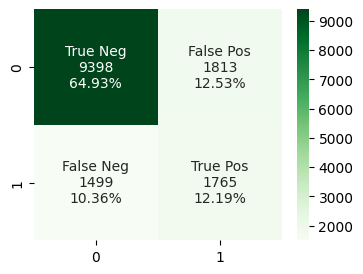

In [83]:
y_pred_test = best_tree_model.predict(X_test)

print("Reporte de clasificación en el conjunto de prueba:")
print(classification_report(y_test, y_pred_test))

plot_conf_matrix(y_test, y_pred_test)

In [84]:
# save txt file with the best parameters and classification report, si ya contne datos, se añaden al final
with open('best_params_DecisionTreeClassifier.txt', 'a') as f:
    # agregamos  las variables que queremos guardar ramdom_state, n_iter, cv, scoring
    f.write(f"Random State: {random_state}\n")
    f.write(f"n_iter: {n_iter}\n")

    f.write(f"Mejores hiperparámetros: {decision_tree_search.best_params_}\n")
    f.write(f"Mejor precisión en validación cruzada: {decision_tree_search.best_score_}\n")
    f.write("Reporte de clasificación en el conjunto de prueba:\n")
    f.write(classification_report(y_test, y_pred_test))
    f.write("\n\n\n")

Reporte de clasificación en el conjunto de Entrenamiento:
              precision    recall  f1-score   support

           0       0.96      0.97      0.96     44510
           1       0.89      0.87      0.88     13386

    accuracy                           0.95     57896
   macro avg       0.93      0.92      0.92     57896
weighted avg       0.94      0.95      0.94     57896



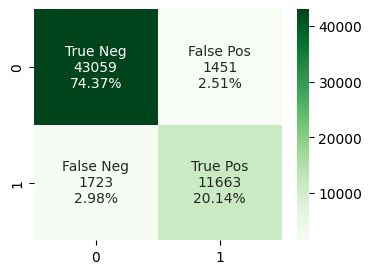

In [85]:
y_pred_train = best_tree_model.predict(X_train)

print("Reporte de clasificación en el conjunto de Entrenamiento:")
print(classification_report(y_train, y_pred_train))

plot_conf_matrix(y_train, y_pred_train)

In [86]:
def visualize_tree(best_model, use_selector, encoded_columns, max_depth=3):
    if use_selector:
        selector_support = best_model.named_steps['selector'].get_support()
        selected_features = [encoded_columns[i] for i, selected in enumerate(selector_support) if selected]
    else:
        selected_features = best_model.named_steps['preprocessor'].get_feature_names_out()
    
    dot_data = export_graphviz(best_model.named_steps['classifier'], out_file=None,
                               feature_names=selected_features,
                               class_names=['No Rain', 'Rain'],
                               filled=True, rounded=True,
                               special_characters=True,
                               max_depth=max_depth)

    # Añadir el atributo de tamaño al string DOT
    dot_data = 'digraph Tree {\nsize="14,10";\n' + dot_data.split('digraph Tree {', 1)[1]

    graph = graphviz.Source(dot_data)
    return graph

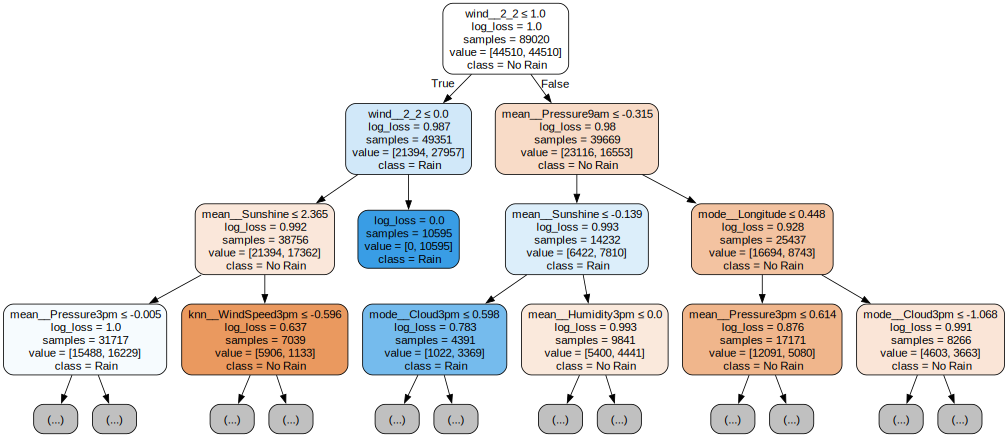

In [87]:
visualize_tree(best_tree_model, use_selector=False, encoded_columns=encoded_columns, max_depth=3)

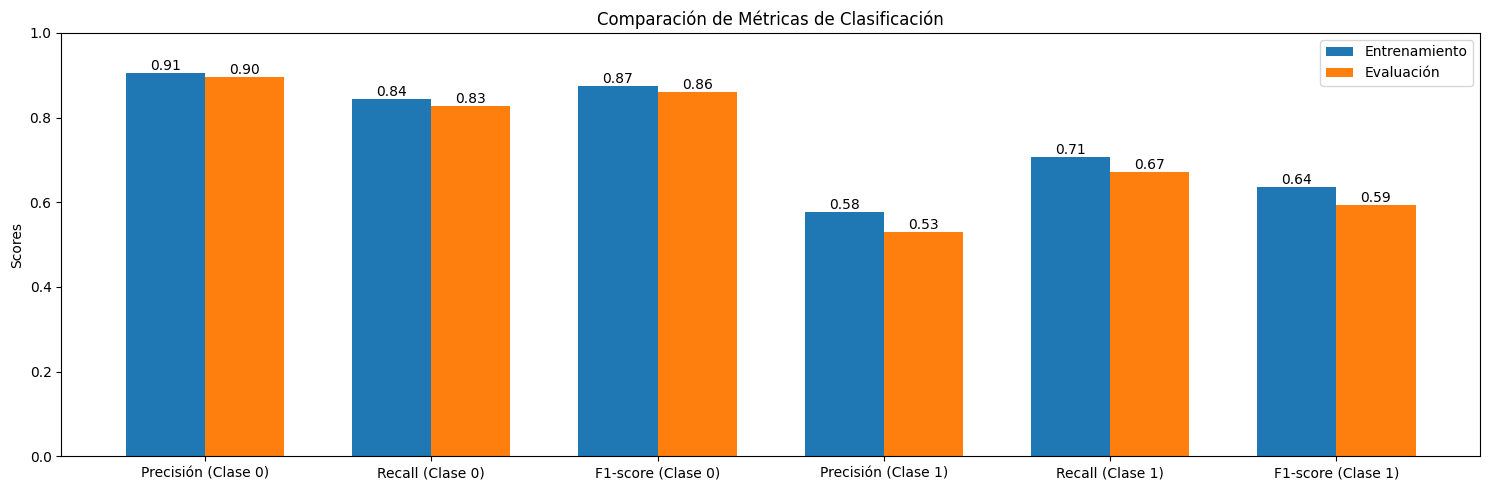

In [88]:
plot_classification_metrics(y_train, y_train_pred, y_test, y_test_pred)

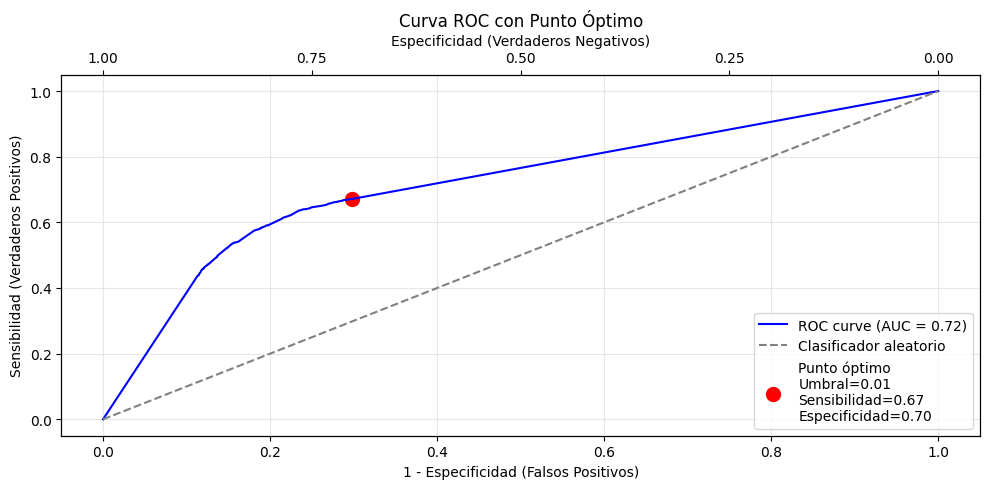

In [93]:
plot_roc_curve(best_tree_model, X_test, y_test)

- Se puede modificar el umbral de decisión para ajustar el trade-off entre precisión y recall, lo que puede ser útil dependiendo de la aplicación. En este caso se ajusta el umbral para equilibrar la precisión y el recall. Esto nos generá que disminuya los Falsos Negativos y aumente los Falsos Posivos.

              precision    recall  f1-score   support

           0       0.87      0.81      0.84     11211
           1       0.47      0.58      0.52      3264

    accuracy                           0.76     14475
   macro avg       0.67      0.70      0.68     14475
weighted avg       0.78      0.76      0.77     14475



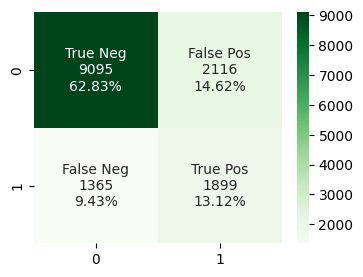

In [110]:
threshold = 0.45
y_test_pred_11_recall = y_scores = best_tree_model.predict_proba(X_test)
y_test_pred_11_recall = (y_test_pred_11_recall[:, 1] >= threshold).astype(int)

print(classification_report(y_test, y_test_pred_11_recall))

plot_conf_matrix(y_test, y_test_pred_11_recall)

In [119]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import learning_curve

def plot_learning_curve(model, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1):
    """
    Genera la curva de aprendizaje para un modelo dado.

    Parameters:
    - model: El modelo de clasificación.
    - X_train: Características de entrenamiento.
    - y_train: Etiquetas de entrenamiento.
    - cv: Número de particiones para la validación cruzada (default: 5).
    - scoring: Métrica para evaluar la precisión (default: 'accuracy').
    - n_jobs: Número de trabajos paralelos a utilizar (default: -1 para usar todos).
    """
    # Define el rango de tamaños del conjunto de entrenamiento
    train_sizes, train_scores, test_scores = learning_curve(
        model, X_train, y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=cv, scoring=scoring, n_jobs=n_jobs
    )

    # Calcular la media y la desviación estándar de los puntajes
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    # Graficar la curva de aprendizaje
    plt.figure(figsize=(10, 3))
    plt.plot(train_sizes, train_scores_mean, label='Entrenamiento', color='blue', linestyle='--', marker='o')
    plt.plot(train_sizes, test_scores_mean, label='Evaluación', color='green', linestyle='--', marker='o')
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, color='blue', alpha=0.2)
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, color='green', alpha=0.2)

    plt.title('Curva de Aprendizaje')
    plt.xlabel('Tamaño del Conjunto de Entrenamiento')
    plt.ylabel('Puntuación de Precisión')
    plt.legend(loc='best')
    plt.grid()
    plt.show()


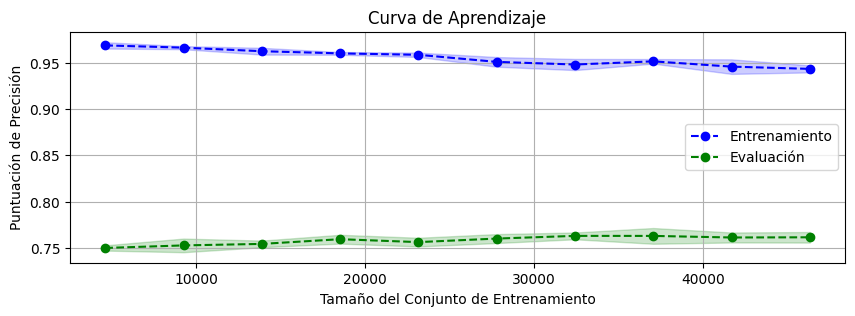

In [120]:
plot_learning_curve(best_tree_model, X_train, y_train, cv=cv, scoring='recall', n_jobs=-1)

- Feture Importance

In [94]:
# Obtener el modelo final (DecisionTreeClassifier) 
model = best_tree_model.named_steps['classifier']

# Obtener las importancias de las características
importances = model.feature_importances_


In [95]:
# Obtener los nombres de las características transformadas
encoded_columns = best_tree_model.named_steps['preprocessor'].get_feature_names_out()

# Mostrar las importancias con sus correspondientes nombres de columnas
import pandas as pd

feature_importances = pd.DataFrame({'feature': encoded_columns, 'importance': importances})
feature_importances = feature_importances.sort_values(by='importance', ascending=True)


In [ ]:
fig, ax = plt.subplots(figsize=(5, 10))

# Graficar las importancias
ax.barh(feature_importances['feature'], feature_importances['importance'])
ax.set_xlabel('Importancia')
ax.set_ylabel('Característica')
ax.set_title('Importancia de las Características')
plt.show()


## Model 2: RandomForestClassifier

In [94]:
model_pipeline_random_fores = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('selector', SelectKBest(score_func=f_classif, k=10)),
    ('classifier', RandomForestClassifier())
])

In [95]:
param_grid_random_fores = {
    'classifier__n_estimators': [100, 200, 300, 500],
    'classifier__criterion': ['gini', 'entropy'],
    'classifier__max_depth': [None, 10, 20, 30, 40, 50],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4],
    'classifier__class_weight': ['balanced', 'balanced_subsample']
}

In [96]:
random_state = 42
cv = StratifiedKFold(n_splits=3)
n_iter = 1

In [97]:
randon_fores_search = RandomizedSearchCV(model_pipeline_random_fores, param_grid_random_fores, n_iter=n_iter, cv=cv, scoring="recall", n_jobs=-1, verbose=1, random_state=random_state)

In [98]:
%%time
randon_fores_search.fit(X_train, y_train)

Fitting 3 folds for each of 1 candidates, totalling 3 fits
CPU times: total: 51.7 s
Wall time: 1min 25s


RandomizedSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('knn',
                                                                               Pipeline(steps=[('imputer',
                                                                                                KNNImputer(n_neighbors=3)),
                                                                                               ('scaler',
                                                                                                StandardScaler())]),
                                                                               ['WindGustSpeed',
                                                                                'WindSpeed9am',
                                                                                'WindSpeed3pm']),
                                                                              ('mean',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer()),
                                                                                               ('...
                   n_iter=1, n_jobs=-1,
                   param_distributions={'classifier__class_weight': ['balanced',
                                                                     'balanced_subsample'],
                                        'classifier__criterion': ['gini',
                                                                  'entropy'],
                                        'classifier__max_depth': [None, 10, 20,
                                                                  30, 40, 50],
                                        'classifier__min_samples_leaf': [1, 2,
                                                                         4],
                                        'classifier__min_samples_split': [2, 5,
                                                                          10],
                                        'classifier__n_estimators': [100, 200,
                                                                     300,
                                                                     500]},
                   random_state=42, scoring='recall', verbose=1)

In [123]:
best_forest_model = randon_fores_search.best_estimator_

print(f"Mejores hiperparámetros: {randon_fores_search.best_params_}\n")
print(f"Mejor precisión en validación cruzada: {randon_fores_search.best_score_}\n")

Mejores hiperparámetros: {'classifier__n_estimators': 300, 'classifier__min_samples_split': 5, 'classifier__min_samples_leaf': 4, 'classifier__max_depth': 20, 'classifier__criterion': 'gini', 'classifier__class_weight': 'balanced'}

Mejor precisión en validación cruzada: 0.6331241595696997



In [ ]:
y_pred_test = randon_fores_search.predict(X_test)
print("Reporte de clasificación en el conjunto de prueba:")
report_test = classification_report(y_test, y_pred_test, output_dict=True)
print(classification_report(y_test, y_pred_test))

plot_conf_matrix(y_test, y_pred_test)

In [104]:
# save txt file with the best parameters and classification report, si ya contne datos, se añaden al final
with open('best_params.txt', 'a') as f:
    # agregamos  las variables que queremos guardar ramdom_state, n_iter, cv, scoring
    f.write(f"Random State: {random_state}\n")
    f.write(f"n_iter: {n_iter}\n")

    f.write(f"Mejores hiperparámetros: {randon_fores_search.best_params_}\n")
    f.write(f"Mejor precisión en validación cruzada: {randon_fores_search.best_score_}\n")
    f.write("Reporte de clasificación en el conjunto de prueba:\n")
    f.write(classification_report(y_test, y_pred_test))
    f.write("\n\n\n")

In [ ]:
y_pred_train = best_forest_model.predict(X_train)
print("Reporte de clasificación en el conjunto de Entrenamiento:")
report_test = classification_report(y_train, y_pred_train, output_dict=True)
print(classification_report(y_train, y_pred_train))

plot_conf_matrix(y_train, y_pred_train)

In [106]:
def visualize_random_forest_tree(best_model, use_selector, encoded_columns, max_depth=3, tree_index=0):
    # Seleccionar el árbol específico del bosque aleatorio
    classifier = best_model.named_steps['classifier'].estimators_[tree_index]

    # Obtener nombres de características
    if use_selector:
        selector_support = best_model.named_steps['selector'].get_support()
        selected_features = [encoded_columns[i] for i, selected in enumerate(selector_support) if selected]
    else:
        selected_features = best_model.named_steps['preprocessor'].get_feature_names_out()

    dot_data = export_graphviz(classifier, out_file=None,
                               feature_names=selected_features,
                               class_names=['No Rain', 'Rain'],
                               filled=True, rounded=True,
                               special_characters=True,
                               max_depth=max_depth)

    # Ajustar tamaño
    dot_data = 'digraph Tree {\nsize="14,10";\n' + dot_data.split('digraph Tree {', 1)[1]

    graph = graphviz.Source(dot_data)
    return graph

In [ ]:
visualize_random_forest_tree(best_forest_model, use_selector=True, encoded_columns=encoded_columns, max_depth=3, tree_index=0)

In [ ]:
plot_classification_metrics(y_train, y_train_pred, y_test, y_test_pred)

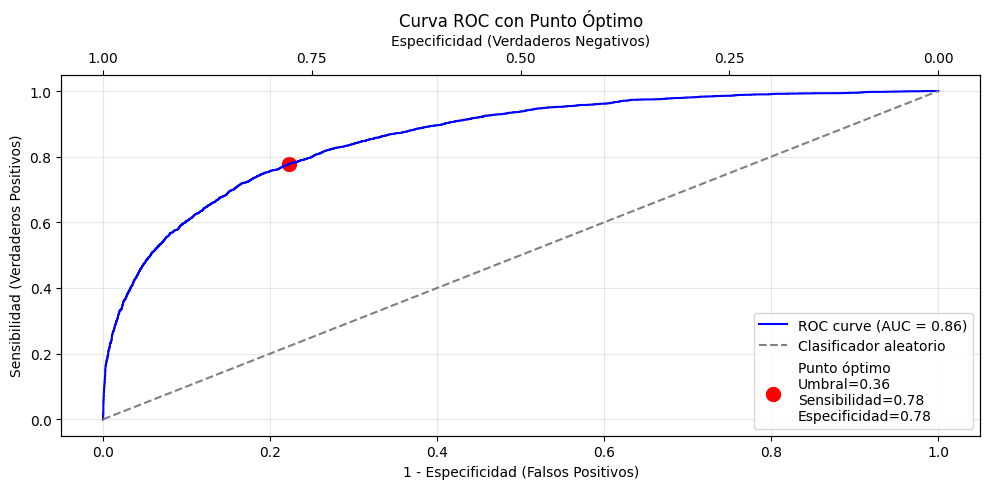

In [100]:
plot_roc_curve(best_forest_model, X_test, y_test)

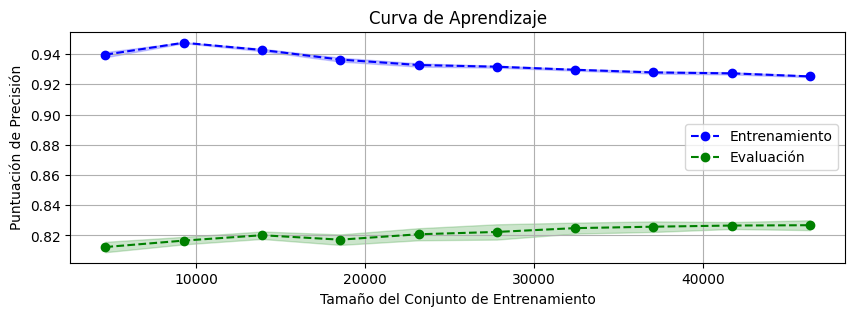

In [124]:
plot_learning_curve(best_forest_model, X_train, y_train, cv=cv, scoring='recall', n_jobs=-1)

## Model 3: XGBoost

In [101]:
# inportamos XGBoost
from xgboost import XGBClassifier

model_pipeline_xgboost = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('selector', SelectKBest(score_func=f_classif, k=10)),
    ('classifier', XGBClassifier())
])

In [102]:
hiperparams_xgboost = {
    'classifier__n_estimators': [100, 200, 300, 500],
    'classifier__max_depth': [3, 5, 7, 9],
    'classifier__learning_rate': [0.01, 0.1, 0.3],
    'classifier__subsample': [0.5, 0.7, 1],
    'classifier__colsample_bytree': [0.5, 0.7, 1],
    'classifier__gamma': [0, 1, 5],
    'classifier__reg_alpha': [0, 0.1, 1],
    'classifier__reg_lambda': [0, 1, 5],
}

In [103]:
random_state = 42
cv = StratifiedKFold(n_splits=3)
n_iter = 1

In [104]:
xgboost_search = RandomizedSearchCV(model_pipeline_xgboost, hiperparams_xgboost, n_iter=n_iter, cv=cv, scoring="recall", n_jobs=-1, verbose=1, random_state=random_state)

In [105]:
%%time
xgboost_search.fit(X_train, y_train)

Fitting 3 folds for each of 1 candidates, totalling 3 fits
CPU times: total: 20.4 s
Wall time: 25.9 s


RandomizedSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('knn',
                                                                               Pipeline(steps=[('imputer',
                                                                                                KNNImputer(n_neighbors=3)),
                                                                                               ('scaler',
                                                                                                StandardScaler())]),
                                                                               ['WindGustSpeed',
                                                                                'WindSpeed9am',
                                                                                'WindSpeed3pm']),
                                                                              ('mean',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer()),
                                                                                               ('...
                   param_distributions={'classifier__colsample_bytree': [0.5,
                                                                         0.7,
                                                                         1],
                                        'classifier__gamma': [0, 1, 5],
                                        'classifier__learning_rate': [0.01, 0.1,
                                                                      0.3],
                                        'classifier__max_depth': [3, 5, 7, 9],
                                        'classifier__n_estimators': [100, 200,
                                                                     300, 500],
                                        'classifier__reg_alpha': [0, 0.1, 1],
                                        'classifier__reg_lambda': [0, 1, 5],
                                        'classifier__subsample': [0.5, 0.7, 1]},
                   random_state=42, scoring='recall', verbose=1)

In [106]:
best_xgboost_model = xgboost_search.best_estimator_

print(f"Mejores hiperparámetros: {xgboost_search.best_params_}\n")
print(f"Mejor precisión en validación cruzada: {xgboost_search.best_score_}\n")

Mejores hiperparámetros: {'classifier__subsample': 0.7, 'classifier__reg_lambda': 5, 'classifier__reg_alpha': 0, 'classifier__n_estimators': 200, 'classifier__max_depth': 9, 'classifier__learning_rate': 0.1, 'classifier__gamma': 5, 'classifier__colsample_bytree': 0.7}

Mejor precisión en validación cruzada: 0.5820259973106231



In [ ]:
y_pred_test = best_xgboost_model.predict(X_test)
print("Reporte de clasificación en el conjunto de prueba:")
print(classification_report(y_test, y_pred_test))

plot_conf_matrix(y_test, y_pred_test)

In [116]:
# save txt file with the best parameters and classification report, si ya contne datos, se añaden al final
with open('best_params_xgboost.txt', 'a') as f:
    # agregamos  las variables que queremos guardar ramdom_state, n_iter, cv, scoring
    f.write(f"Random State: {random_state}\n")
    f.write(f"n_iter: {n_iter}\n")

    f.write(f"Mejores hiperparámetros: {xgboost_search.best_params_}\n")
    f.write(f"Mejor precisión en validación cruzada: {xgboost_search.best_score_}\n")
    f.write("Reporte de clasificación en el conjunto de prueba:\n")
    f.write(classification_report(y_test, y_pred_test))
    f.write("\n\n\n")


In [ ]:
y_pred_train = best_xgboost_model.predict(X_train)
print("Reporte de clasificación en el conjunto de Entrenamiento:")
print(classification_report(y_train, y_pred_train))

plot_conf_matrix(y_train, y_pred_train)

In [ ]:
import xgboost as xgb
import matplotlib.pyplot as pl

def visualize_xgboost_tree(model, num_tree=0):
    xgb.plot_tree(model, num_trees=num_tree)
    plt.rcParams['figure.figsize'] = [14, 10]
    plt.show()

visualize_xgboost_tree(best_xgboost_model.named_steps['classifier'], num_tree=0)

In [119]:
# xgb.to_graphviz(best_xgboost_model.named_steps['classifier'], num_trees=0, max_depth=1)

In [107]:
# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.metrics import classification_report 

# def plot_classification_report(report_train, report_test, title='Comparación de Métricas de Clasificación'):
#     """
#     Función para visualizar el reporte de clasificación para las clases 0 y 1.
    
#     Parameters:
#     - report_train: dict, reporte de clasificación para el conjunto de entrenamiento.
#     - report_test: dict, reporte de clasificación para el conjunto de evaluación.
#     - title: str, título para el gráfico.
#     """
#     # Extraer métricas de precisión, recall y F1-score
#     metrics = ['precision', 'recall', 'f1-score']
#     train_scores = [report_train['0'][metric] for metric in metrics] + [report_train['1'][metric] for metric in metrics]
#     test_scores = [report_test['0'][metric] for metric in metrics] + [report_test['1'][metric] for metric in metrics]

#     # Soporte (número de instancias por clase)
#     support_train = [report_train['0']['support'], report_train['1']['support']]
#     support_test = [report_test['0']['support'], report_test['1']['support']]

#     # Crear etiquetas para el gráfico
#     labels = [
#         'Precisión (Clase 0)', 'Recall (Clase 0)', 'F1-score (Clase 0)', 
#         'Precisión (Clase 1)', 'Recall (Clase 1)', 'F1-score (Clase 1)'
#     ]
#     x = np.arange(len(labels))  # la ubicación de las etiquetas
#     width = 0.35  # el ancho de las barras

#     fig, ax = plt.subplots(figsize=(15, 5))

#     # Barras para el conjunto de entrenamiento
#     rects1 = ax.bar(x - width/2, train_scores, width, label='Entrenamiento')

#     # Barras para el conjunto de evaluación
#     rects2 = ax.bar(x + width/2, test_scores, width, label='Evaluación')

#     # Añadir valores numéricos en las barras
#     for i, rect in enumerate(rects1):
#         ax.text(
#             rect.get_x() + rect.get_width() / 2, rect.get_height(), 
#             f'{train_scores[i]:.2f}', ha='center', va='bottom'
#         )

#     for i, rect in enumerate(rects2):
#         ax.text(
#             rect.get_x() + rect.get_width() / 2, rect.get_height(), 
#             f'{test_scores[i]:.2f}', ha='center', va='bottom'
#         )

#     # Añadir etiquetas de soporte junto al eje X
#     for i, (support_t, support_e) in enumerate(zip(support_train, support_test)):
#         ax.text(i - width, -0.05, f'Entrenamiento: n={support_t}', ha='center', va='top', fontsize=9, color='gray')
#         ax.text(i + width, -0.05, f'Evaluación: n={support_e}', ha='center', va='top', fontsize=9, color='gray')

#     # Añadir algunas etiquetas y título
#     ax.set_ylabel('Scores')
#     ax.set_title(title)
#     ax.set_xticks(x)
#     ax.set_xticklabels(labels)
#     ax.legend()

#     # Ajustar el límite del eje Y para que se vea mejor
#     plt.ylim(0, 1)
#     plt.tight_layout()
#     plt.show()


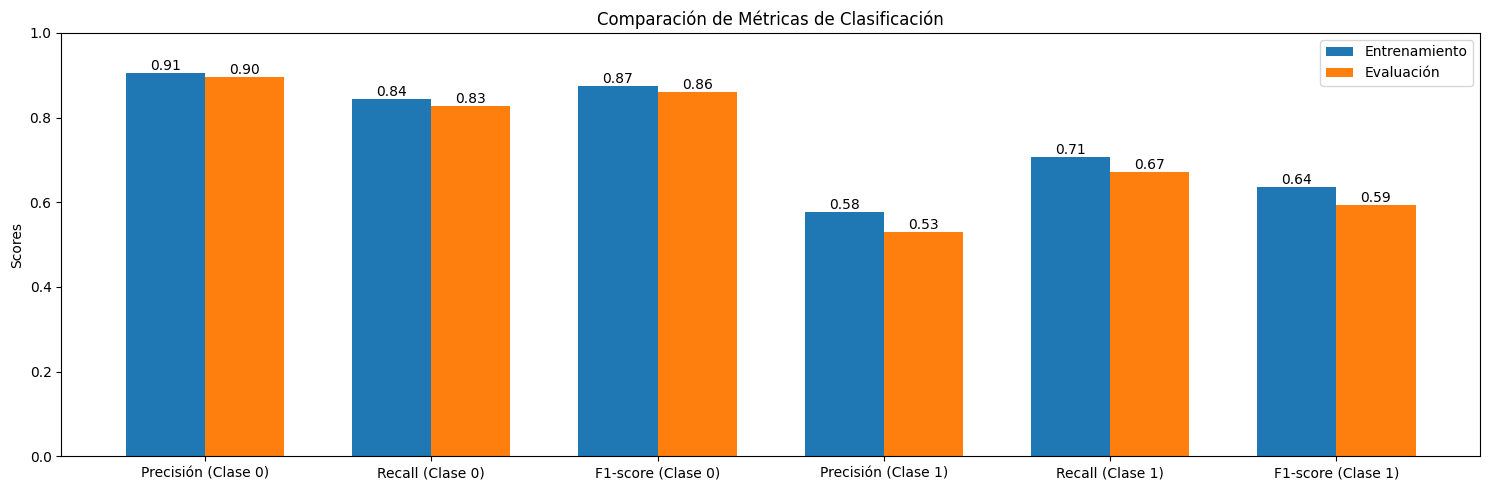

In [108]:
plot_classification_metrics(y_train, y_train_pred, y_test, y_test_pred)

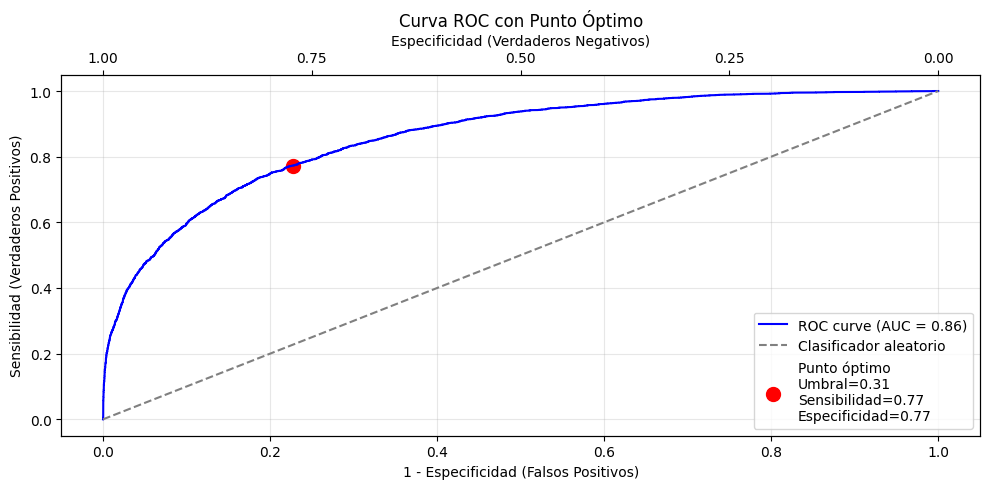

In [109]:
plot_roc_curve(best_xgboost_model, X_test, y_test)

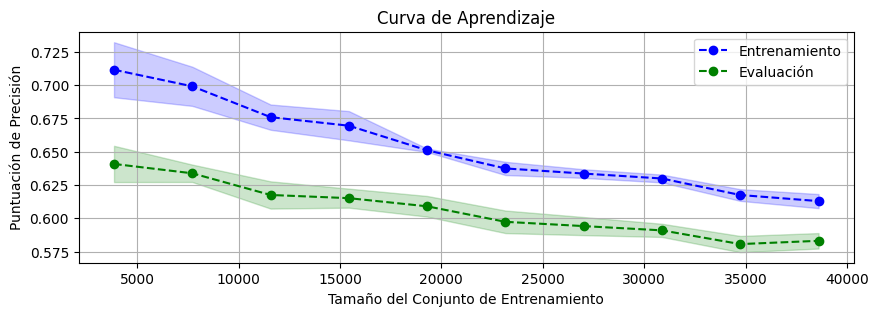

In [125]:
plot_learning_curve(best_xgboost_model, X_train, y_train, cv=cv, scoring='recall', n_jobs=-1)